![Header IMage](https://drive.google.com/uc?id=1c4b0d80YADoKpuGa8LQ-BmW1hLp4Xp6L)

 # 09. Milestone Project 2: SkimLit 📄🔥

In the previous notebook ([NLP fundamentals in TensorFlow](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/08_introduction_to_nlp_in_tensorflow.ipynb)), we went through some fundamental natural lanuage processing concepts. The main ones being **tokenzation** (turning words into numbers) and **creating embeddings** (creating a numerical representation of words).

In this project, we're going to be putting what we've learned into practice.

More specificially, we're going to be replicating the deep learning model behind the 2017 paper [*PubMed 200k RCT: a Dataset for Sequenctial Sentence Classification in Medical Abstracts*](https://arxiv.org/abs/1710.06071).

When it was released, the paper presented a new dataset called PubMed 200k RCT which consists of ~200,000 labelled Randomized Controlled Trial (RCT) abstracts.

The goal of the dataset was to explore the ability for NLP models to classify sentences which appear in sequential order.

In other words, given the abstract of a RCT, what role does each sentence serve in the abstract?

![Skimlit example inputs and outputs](https://drive.google.com/uc?id=1dUzrW9l_70xzQngozS0_rgU7xvNx7W8R)

*Example inputs ([harder to read abstract from PubMed](https://pubmed.ncbi.nlm.nih.gov/28942748/)) and outputs ([easier to read abstract](https://pubmed.ncbi.nlm.nih.gov/32537182/)) of the model we're going to build. The model will take an abstract wall of text and predict the section label each sentence should have.*  

### Model Input

For example, can we train an NLP model which takes the following input (note: the following sample has had all numerical symbols replaced with "@"):

> To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ). A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks. Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers. Pain was assessed using the visual analog pain scale ( @-@ mm ).
Secondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ).,
Serum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP ) were measured.
There was a clinically relevant reduction in the intervention group compared to the placebo group for knee pain , physical function , PGA , and @MWD at @ weeks. The mean difference between treatment arms ( @ % CI ) was @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; and @ ( @-@ @ ) , p < @ , respectively. Further , there was a clinically relevant reduction in the serum levels of IL-@ , IL-@ , TNF - , and hsCRP at @ weeks in the intervention group when compared to the placebo group. These differences remained significant at @ weeks. The Outcome Measures in Rheumatology Clinical Trials-Osteoarthritis Research Society International responder rate was @ % in the intervention group and @ % in the placebo group ( p < @ ). Low-dose oral prednisolone had both a short-term and a longer sustained effect resulting in less knee pain , better physical function , and attenuation of systemic inflammation in older patients with knee OA ( ClinicalTrials.gov identifier NCT@ ).

### Model output

And returns the following output:

```
['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP ) were measured .\n',
 'RESULTS\tThere was a clinically relevant reduction in the intervention group compared to the placebo group for knee pain , physical function , PGA , and @MWD at @ weeks .\n',
 'RESULTS\tThe mean difference between treatment arms ( @ % CI ) was @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; and @ ( @-@ @ ) , p < @ , respectively .\n',
 'RESULTS\tFurther , there was a clinically relevant reduction in the serum levels of IL-@ , IL-@ , TNF - , and hsCRP at @ weeks in the intervention group when compared to the placebo group .\n',
 'RESULTS\tThese differences remained significant at @ weeks .\n',
 'RESULTS\tThe Outcome Measures in Rheumatology Clinical Trials-Osteoarthritis Research Society International responder rate was @ % in the intervention group and @ % in the placebo group ( p < @ ) .\n',
 'CONCLUSIONS\tLow-dose oral prednisolone had both a short-term and a longer sustained effect resulting in less knee pain , better physical function , and attenuation of systemic inflammation in older patients with knee OA ( ClinicalTrials.gov identifier NCT@ ) .\n',
 '\n']
 ```

### Problem in a sentence

The number of RCT papers released is continuing to increase, those without structured abstracts can be hard to read and in turn slow down researchers moving through the literature.

### Solution in a sentence

Create an NLP model to classify abstract sentences into the role they play (e.g. objective, methods, results, etc)  to enable researchers to skim through the literature (hence SkimLit 🤓🔥) and dive deeper when necessary.

> 📖 **Resources:** Before going through the code in this notebook, you might want to get a background of what we're going to be doing. To do so, spend an hour (or two) going through the following papers and then return to this notebook:
1. Where our data is coming from: [*PubMed 200k RCT: a Dataset for Sequential Sentence Classification in Medical Abstracts*](https://arxiv.org/abs/1710.06071)
2. Where our model is coming from: [*Neural networks for joint sentence
classification in medical paper abstracts*](https://arxiv.org/pdf/1612.05251.pdf).

## What we're going to cover

Time to take what we've learned in the NLP fundmentals notebook and build our biggest NLP model yet:

* Downloading a text dataset ([PubMed RCT200k from GitHub](https://github.com/Franck-Dernoncourt/pubmed-rct))
* Writing a **preprocessing function** to prepare our data for modelling
* Setting up a series of modelling experiments
  * Making a **baseline (TF-IDF classifier)**
  * Deep models with different combinations of: token embeddings, character embeddings, pretrained embeddings, positional embeddings
* Building our first **multimodal model (taking multiple types of data inputs)**
  * Replicating the model architecture from https://arxiv.org/abs/1612.05251
* Find the most wrong predictions
* Making predictions on PubMed abstracts from the wild

![Skimlit Sequence problem:many to one](https://drive.google.com/uc?id=1fiRgD78F3wrMv1aObiw6Sgj13giN5tMK)

![SkimlitInput output](https://drive.google.com/uc?id=1_gER1x-X-Jlc-Elo36GZxmCsJjRf7qc4)


## Confirming GPU connection

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-6300c471-37b8-1e23-323c-5ada3f3d3afa)


In [ ]:
# Importing useable modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
import tensorflow as tf

## Importing Helper function

In [ ]:
!wget https://raw.githubusercontent.com/abhi24112/Artificial-intelligence/refs/heads/main/helper_functions.py

--2025-04-16 06:43:49--  https://raw.githubusercontent.com/abhi24112/Artificial-intelligence/refs/heads/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11323 (11K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  11.06K  --.-KB/s    in 0s      

2025-04-16 06:43:49 (112 MB/s) - ‘helper_functions.py.1’ saved [11323/11323]



In [ ]:
from helper_functions import create_tensorboard_callback, unzip_data, calculate_results, compare_historys

## Get data

Since we'll be replicating the paper above (PubMed 200k RCT), Let's download the dataset
We can do so from  the authors github:

In [ ]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 39 (delta 8), reused 5 (delta 5), pack-reused 25 (from 1)
Receiving objects: 100% (39/39), 177.08 MiB | 42.07 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [ ]:
!ls pubmed-rct

PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [ ]:
# Check what files are in the PubMed_20k dataset
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign// # we are using this.
!ls pubmed-rct/PubMed_20k_RCT/

dev.txt  test.txt  train.txt
dev.txt  test.txt  train.txt


In [ ]:
# Start our experiments using the 20k dataset
data_dir = "/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign"

In [ ]:
# Check all the filenames in the target directory
import os
filenames = [data_dir +'/'+ filename for filename in os.listdir(data_dir)]
filenames

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt']

## Preprocess data

Now we've got some text data, it's time to become one with it.

Adn one of the best ways to become one with the data is to...

> Visualize, visualize, visualize

So with that in mind, let's write a function to read in all of the lines of a target text file.

In [ ]:
# Create function to read line of the text file
def get_lines(filename):
  """
  Read filename (a text filename) and returns the lines of the text file.
  """
  with open(filename, "r") as f:
    return f.readlines()

In [ ]:
# Let's read in the training file lines
train_lines = get_lines(data_dir+"/train.txt")
train_lines[:27]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [ ]:
len(train_lines)

210040

Let's think about how we want our data to look..

How i think our data should look like...

```
[{"line_number': 0,
  "target":'BACKGROUND',
  "text":'Emotional eating is associated with overeating and the development of obesity .\n',
  'total_lines': 11},
  .....]
```


In [ ]:
text = "Hello\r\nWorld\rWelcome\tto Python\n"
lines = text.splitlines()
print(lines)

['Hello', 'World', 'Welcome\tto Python']


In [ ]:
# Let' create a function to create data in that formate
def preprocess_text_with_line_numbers(filename):
  lines = get_lines(filename)
  abstract_lines = ""
  abstract_samples = []

  for line in lines:

    if line.startswith("###"):
      abstract_id = line
      abstract_lines = ""

    elif line.isspace():
      abstract_line_split = abstract_lines.splitlines()

      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {}
        target_text_split = abstract_line.split("\t")
        line_data['total_lines'] = len(abstract_line_split)
        line_data["target"]=target_text_split[0]
        line_data['text']=target_text_split[1].lower()
        line_data["line_numbers"] = abstract_line_number
        abstract_samples.append(line_data)

    else:
      abstract_lines += line
  return abstract_samples

In [ ]:
# Get data from file and preprocess it
%%time
train_samples = preprocess_text_with_line_numbers(data_dir + "/train.txt")
val_samples = preprocess_text_with_line_numbers(data_dir + "/dev.txt")
test_samples = preprocess_text_with_line_numbers(data_dir + "/test.txt")
print(len(train_samples), len(val_samples), len(test_samples))

180040 30212 30135
CPU times: user 317 ms, sys: 101 ms, total: 418 ms
Wall time: 414 ms


In [ ]:
# Check the first abstract of our data
train_samples[:14]

[{'total_lines': 12,
  'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_numbers': 0},
 {'total_lines': 12,
  'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_numbers': 1},
 {'total_lines': 12,
  'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_numbers': 2},
 {'total_lines': 12,
  'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_numbers': 3},
 {'total_lines': 12,
  'target': 'METHODS',
  'text': 'secondary outcome measures in

In [ ]:
# Let's convert the preprossed data into the dataframes
train_df = pd.DataFrame(train_samples)
test_df = pd.DataFrame(test_samples)
val_df = pd.DataFrame(val_samples)
train_df.head(14)

,total_lines,target,text,line_numbers
0,12,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0
1,12,METHODS,a total of @ patients with primary knee oa wer...,1
2,12,METHODS,outcome measures included pain reduction and i...,2
3,12,METHODS,pain was assessed using the visual analog pain...,3
4,12,METHODS,secondary outcome measures included the wester...,4
5,12,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5
6,12,RESULTS,there was a clinically relevant reduction in t...,6
7,12,RESULTS,the mean difference between treatment arms ( @...,7
8,12,RESULTS,"further , there was a clinically relevant redu...",8
9,12,RESULTS,these differences remained significant at @ we...,9


In [ ]:
# Let's see the distribution of the targets
dis_target = train_df.target.value_counts().reset_index() # converting series into dataframe
dis_target

,target,count
0,METHODS,59353
1,RESULTS,57953
2,CONCLUSIONS,27168
3,BACKGROUND,21727
4,OBJECTIVE,13839


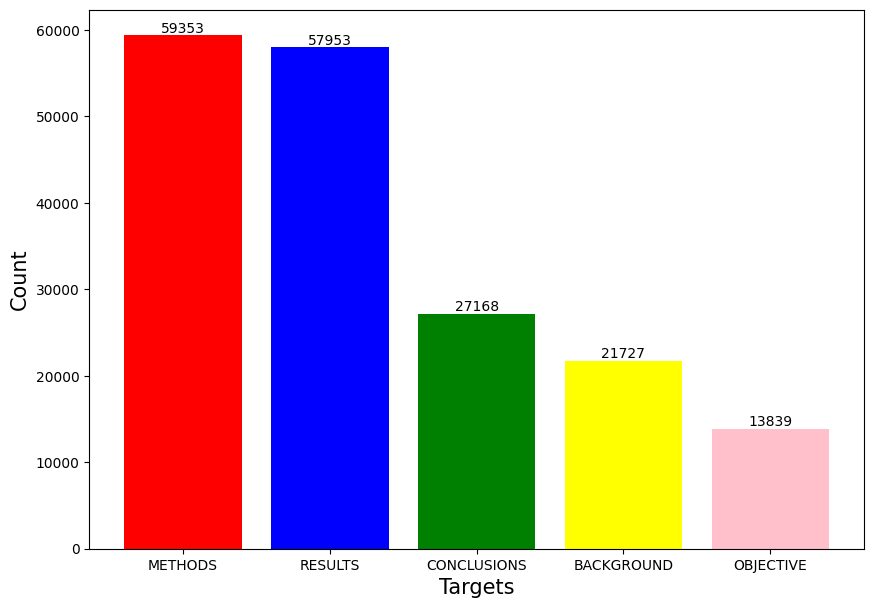

In [ ]:
# Let's visualize the distribution of the targets
plt.figure(figsize=(10,7))
colors = ['red','blue','green','yellow','pink']
bars = plt.bar(data=dis_target, x="target", height='count',color=colors)
plt.bar_label(bars)
plt.xlabel("Targets", size=15)
plt.ylabel("Count", size=15)
plt.show()

In [ ]:
# Converting the text into sentences
train_sentences = train_df["text"].to_list()
val_sentences = val_df["text"].to_list()
test_sentences = test_df["text"].to_list()
len(train_sentences), len(val_sentences), len(test_sentences)

(180040, 30212, 30135)

In [ ]:
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

## Making Numeric Labels

In [ ]:
# One hot encoder labels
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False) # tensorflow is not compatible with spare_output
train_labels_one_hot = one_hot_encoder.fit_transform(tf.expand_dims(train_df["target"].to_numpy(), axis=1))
val_labels_one_hot = one_hot_encoder.fit_transform(tf.expand_dims(val_df["target"].to_numpy(), axis=1))
test_labels_one_hot = one_hot_encoder.fit_transform(tf.expand_dims(test_df["target"].to_numpy(), axis=1))

train_labels_one_hot = tf.constant(train_labels_one_hot) # coverting them into tensor
val_labels_one_hot = tf.constant(val_labels_one_hot)
test_labels_one_hot = tf.constant(test_labels_one_hot)

train_labels_one_hot,  val_labels_one_hot, test_labels_one_hot

(<tf.Tensor: shape=(180040, 5), dtype=float64, numpy=
 array([[0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        ...,
        [0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.]])>,
 <tf.Tensor: shape=(30212, 5), dtype=float64, numpy=
 array([[1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        ...,
        [0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.]])>,
 <tf.Tensor: shape=(30135, 5), dtype=float64, numpy=
 array([[1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        ...,
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0.]])>)

In [ ]:
## Labels encoder labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_label_encoded = label_encoder.fit_transform(train_df['target'].to_numpy())
val_label_encoded = label_encoder.fit_transform(val_df['target'].to_numpy())
test_label_encoded = label_encoder.fit_transform(test_df['target'].to_numpy())

train_label_encoded, val_label_encoded, test_label_encoded

(array([3, 2, 2, ..., 4, 1, 1]),
 array([0, 0, 3, ..., 4, 1, 1]),
 array([0, 4, 4, ..., 4, 4, 1]))

In [ ]:
# seeing what is transformed in what
label_dic = {}
for no,label in enumerate(label_encoder.classes_):
    encode_value = label_encoder.inverse_transform([no])[0]
    label_dic[no] = encode_value
label_dic

{0: 'BACKGROUND', 1: 'CONCLUSIONS', 2: 'METHODS', 3: 'OBJECTIVE', 4: 'RESULTS'}

In [ ]:
# creating a list of all classes
class_names = label_encoder.classes_
class_names

array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
      dtype=object)

## Experiment of the Models
![Experiments of the model we are going to build](https://drive.google.com/uc?id=1H73GpQOtjQnNteCAoQzl7ZNeYKgcITVL)

### Model_0 (Getting Baseline for the models)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

baseline = Pipeline([('tfidf',TfidfVectorizer()),
                           ('mnb',MultinomialNB())])
baseline.fit(train_sentences, train_label_encoded)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('mnb', MultinomialNB())])

In [ ]:
# Let's find the score of the model
baseline.score(val_sentences, val_label_encoded) * 100

72.1832384482987

In [ ]:
# Making prediction on the dataset
baseline_pred = baseline.predict(val_sentences)
baseline_pred

array([4, 1, 3, ..., 4, 4, 1])

In [ ]:
pd.set_option('display.max_colwidth', None)  # None means no truncation

In [ ]:
# Making dataframe for better visualization of the predictions
baseline_df = pd.DataFrame({
    "text":val_sentences,
    'label':val_label_encoded,
    "Predictions":baseline_pred
})
baseline_df

,text,label,Predictions
0,ige sensitization to aspergillus fumigatus and a positive sputum fungal culture result are common in patients with refractory asthma .,0,4
1,it is not clear whether these patients would benefit from antifungal treatment .,0,1
2,we sought to determine whether a @-month course of voriconazole improved asthma-related outcomes in patients with asthma who are ige sensitized to a fumigatus .,3,3
3,"asthmatic patients who were ige sensitized to a fumigatus with a history of at least @ severe exacerbations in the previous @ months were treated for @ months with @ mg of voriconazole twice daily , followed by observation for @ months , in a double-blind , placebo-controlled , randomized design .",2,2
4,primary outcomes were improvement in quality of life at the end of the treatment period and a reduction in the number of severe exacerbations over the @ months of the study .,2,2
...,...,...,...
30207,"pruritus occurred more frequently with the active regimen ( in @ % of patients ) than with placebo ( @ % , p = @ ) .",4,4
30208,three patients in the active-regimen group ( @ % ) discontinued the study drugs owing to adverse events .,4,4
30209,"hemoglobin values of grade @ ( @ to < @ g per deciliter ) and grade @ ( @ to < @ g per deciliter ) occurred in @ % and @ % of patients in the active-regimen group , respectively .",4,4
30210,"rates of response to a @-week interferon-free combination regimen were more than @ % among previously treated patients with hcv genotype @ infection , including patients with a prior null response .",1,4


In [ ]:
# Calculate the result of the model
baseline_result = calculate_results(val_label_encoded, baseline_pred)
baseline_result

{'accuracy': 0.7218323844829869,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

In [ ]:
# Let's make prediction on our own data.
sample_data = " Defining the spatial architecture of hematopoiesis in the bone marrow is indispensable to understand how this tissue ensures stepwise, balanced, differentiation to meet organism demand; for deciphering alterations to hematopoiesis during disease; and for designing organ systems for blood cell production ex vivo."
sample_result = baseline.predict([sample_data])
print(f"Result: {sample_result[0]}\nEncoding_result: {label_dic[sample_result[0]]}")

Result: 1
Encoding_result: CONCLUSIONS


### Model_1 (Conv1D with token embedding)

In [ ]:
# How long is each sentence on average?
word_count = []
for i in train_df['text']:
  length_sen = len(i.split())
  word_count.append(length_sen)
print("Average Length:",sum(word_count)/len(train_df['text']))

Average Length: 26.338269273494777


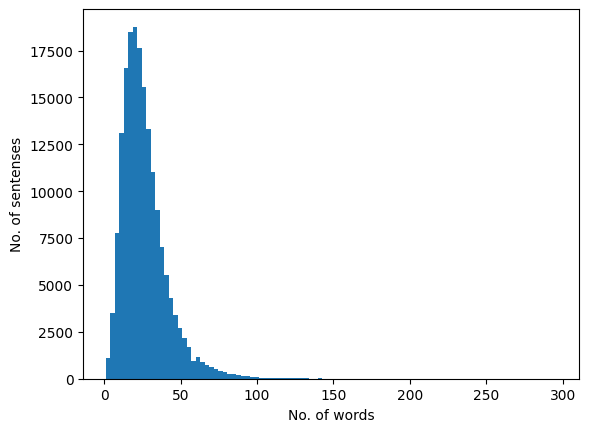

In [ ]:
# Let's see the distribution of the sentence lengths
plt.hist(word_count, bins=100)
plt.xlabel("No. of words")
plt.ylabel("No. of sentenses")
plt.show()

In [ ]:
# Now let see how much words are there in 95% of the sentences
output_seq_len = int(np.percentile(word_count, 95))
output_seq_len

55

#### Tokenization

![](https://drive.google.com/uc?id=1ZVRhx1q1hLQ3SGEGtgjvXYiux94-QWpc)

In [ ]:
# Creating a text vectorizer
from tensorflow.keras import layers
max_vocab_length = 68000
max_length = output_seq_len

text_vectorizer = layers.TextVectorization(max_tokens=max_vocab_length,
                                           output_mode='int',
                                           output_sequence_length= max_length)
# Adapt text vectorizer to training sentences
text_vectorizer.adapt(train_sentences)

In [ ]:
# Test out text vectorizer on random sentence
import random
random_sen = random.sample(train_sentences,1)
print(f"Text: {random_sen[0]}")
print(f"Length of text: {len(random_sen[0])}")
print(f"Vectorized text: {text_vectorizer([random_sen])}")

Text: changes in quality of life and economic indicators were measured by the eq-@d .
Length of text: 79
Vectorized text: [[ 146    5  141    4  195    3 1730 2196    9  156   22    2 2324    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]]


In [ ]:
# Get the top 10 and bottm 10 vocabulary of the text vectorizer
word_in_vocab = text_vectorizer.get_vocabulary()
top_10_vocab = word_in_vocab[:10]
bottom_10_vocab = word_in_vocab[-10:]
print(f"Length of Vocab:{len(word_in_vocab)}")
print(f"Top 10 Words:{top_10_vocab}")
print(f"Bottom 10 Words:{bottom_10_vocab}")

Length of Vocab:64841
Top 10 Words:['', '[UNK]', np.str_('the'), np.str_('and'), np.str_('of'), np.str_('in'), np.str_('to'), np.str_('with'), np.str_('a'), np.str_('were')]
Bottom 10 Words:[np.str_('aarm'), np.str_('aaqol'), np.str_('aaq'), np.str_('aanhui'), np.str_('aana'), np.str_('aainduced'), np.str_('aaigroup'), np.str_('aachener'), np.str_('aachen'), np.str_('aaacp')]


In [ ]:
text_vectorizer.get_config() # hyperparameter used in text vectorizer

{'name': 'text_vectorization',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 64841}

#### Embedding

In [ ]:
# Creatig Embedding of the text_vectorizer (Embedding Layer: Turns positive integers (indexes) into dense vectors of fixed size.(trainable vectors))
embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             name='embedding')
embedding

<Embedding name=embedding, built=False>

In [ ]:
# Checking our embedding on random sentenses
import random
random_sen = random.sample(train_sentences, 1)
random_embedding = embedding(text_vectorizer([random_sen]))
print(f"Random_sentense: {random_sen}\n")
print(f"Embedding: {random_embedding}\n")
print(f"Shape after Embedding: {random_embedding.shape}")

Random_sentense: ['to compare the efficacy of a multi-component intervention to reduce workplace sitting time , to a height-adjustable workstations-only intervention , and to a comparison group ( usual practice ) .']

Embedding: [[[ 0.0382046  -0.02259551 -0.00830227 ... -0.03280222 -0.00151591
   -0.04504926]
  [ 0.01330717 -0.00706033 -0.02746357 ...  0.02938076 -0.04630387
   -0.00530096]
  [ 0.00041478  0.04038249 -0.01925856 ... -0.02450631 -0.04731775
    0.00654928]
  ...
  [ 0.03152733  0.00823053  0.023235   ...  0.0287942   0.03396131
   -0.03750759]
  [ 0.03152733  0.00823053  0.023235   ...  0.0287942   0.03396131
   -0.03750759]
  [ 0.03152733  0.00823053  0.023235   ...  0.0287942   0.03396131
   -0.03750759]]]

Shape after Embedding: (1, 55, 128)


## Create datasets (as fast as possible)

We've gone through all the trouble of preprocessing our datasets to be used with a machine learning model, however, there are still a few steps we can use to make them work faster with our models.

Namely, the `tf.data` API provides methods which enable faster data loading.

> 📖 **Resource:** For best practices on data loading in TensorFlow, check out the following:
* [tf.data: Build TensorFlow input pipelines](https://www.tensorflow.org/guide/data)
* [Better performance with the tf.data API](https://www.tensorflow.org/guide/data_performance)

The main steps we'll want to use with our data is to turn it into a `PrefetchDataset` of batches.

Doing so we'll ensure TensorFlow loads our data onto the GPU as fast as possible, in turn leading to faster training time.

To create a batched `PrefetchDataset` we can use the methods [`batch()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch) and [`prefetch()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch), the parameter [`tf.data.AUTOTUNE`](https://www.tensorflow.org/api_docs/python/tf/data#AUTOTUNE) will also allow TensorFlow to determine the optimal amount of compute to use to prepare datasets.

In [ ]:
# Turn our data into TensorFlow Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
valid_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [ ]:
train_labels_one_hot.shape, train_labels_one_hot[0]

(TensorShape([180040, 5]),
 <tf.Tensor: shape=(5,), dtype=float64, numpy=array([0., 0., 0., 1., 0.])>)

![Prefetching in tensorflow](https://drive.google.com/uc?id=1uVjX4vWB_qAUCXuUdKwgQnvLSxQyDlkd)

`Prefetching`:  This allows later elements to be prepared while the current element is being processed. This often improves latency and throughput, at the cost of using additional memory to store prefetched elements.

In [ ]:
# Take the TensorSliceData's and turn them into prefected datasets
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
train_df['target'].nunique()

5

![Architecture of model_1_conv1d](https://drive.google.com/uc?id=14zPQ76VBKVEwp_RSpff6BPChO-y-zsMk)

In [ ]:
# Let's create the model using Conv1D and Functional API
inputs = layers.Input(shape=(1,), dtype=tf.string, name="Input_Layer")
text_vectors = text_vectorizer(inputs)
token_embedding = embedding(text_vectors)
hidden = layers.Conv1D(filters=10, activation='relu', padding='valid',kernel_size=5)(token_embedding)
hidden = layers.GlobalAveragePooling1D()(hidden)
outputs = layers.Dense(train_df['target'].nunique(), activation='softmax')(hidden)
model_1_conv1d = tf.keras.models.Model(inputs, outputs)

# Compile the model
model_1_conv1d.compile(loss='categorical_crossentropy',
                       optimizer=tf.keras.optimizers.Adam(),
                       metrics=['accuracy'])

In [ ]:
# let's see the model
model_1_conv1d.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)        │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization              │ (None, 55)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 55, 128)        │     8,704,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 51, 10)         │         6,410 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 10)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │            55 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,710,465 (33.23 MB)

 Trainable params: 8,710,465 (33.23 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# fitting the model
SAVE_DIR = "model_logs"
history_model_1_conv1d = model_1_conv1d.fit(train_dataset,
                                            steps_per_epoch=int(0.1*len(train_dataset)),
                                            epochs=5,
                                            validation_data = valid_dataset,
                                            validation_steps=int(0.1*len(valid_dataset)),
                                            callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                                   'model_1_conv1d')])

Saving TensorBoard log files to: model_logs/model_1_conv1d/20250414-085715
Epoch 1/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.4826 - loss: 1.2771 - val_accuracy: 0.6902 - val_loss: 0.7914
Epoch 2/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7077 - loss: 0.7632 - val_accuracy: 0.7477 - val_loss: 0.6894
Epoch 3/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.7470 - loss: 0.6764 - val_accuracy: 0.7576 - val_loss: 0.6574
Epoch 4/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7602 - loss: 0.6513 - val_accuracy: 0.7630 - val_loss: 0.6295
Epoch 5/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7692 - loss: 0.6306 - val_accuracy: 0.7812 - val_loss: 0.6086


In [ ]:
# Let's evaluate the model_1
model_1_conv1d.evaluate(valid_dataset)

945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7842 - loss: 0.6069


[0.6089234352111816, 0.7837945222854614]

In [ ]:
# Making prediction on dataset
model_1_pred_probs = model_1_conv1d.predict(valid_dataset)
model_1_pred_probs[0]

945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([0.48970538, 0.27370533, 0.03025964, 0.17968908, 0.02664061],
      dtype=float32)

In [ ]:
# Converting the pred_probs in classes
model_1_pred = tf.argmax(model_1_pred_probs, axis=1)
model_1_pred

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1])>

In [ ]:
print("Class_names",class_names)
print("Predicition and Class_name",label_dic)

Class_names ['BACKGROUND' 'CONCLUSIONS' 'METHODS' 'OBJECTIVE' 'RESULTS']
Predicition and Class_name {0: 'BACKGROUND', 1: 'CONCLUSIONS', 2: 'METHODS', 3: 'OBJECTIVE', 4: 'RESULTS'}


In [ ]:
# let's calculate the metrics
result_model_1_conv1d = calculate_results(val_label_encoded, model_1_pred)
result_model_1_conv1d

{'accuracy': 0.7837945187342777,
 'precision': 0.7839562040784014,
 'recall': 0.7837945187342777,
 'f1': 0.7809795926581936}

In [ ]:
baseline_result

{'accuracy': 0.7218323844829869,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

## Model 2: Feature extraction with pretrained token embeddings

Training our own embeddings took a little while to run, slowing our experiments down.

Since we're moving towards replicating the model architecture in [*Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts*](https://arxiv.org/pdf/1612.05251.pdf), it mentions they used a [pretrained GloVe embedding](https://nlp.stanford.edu/projects/glove/) as a way to initialise their token embeddings.

To emulate this, let's see what results we can get with the [pretrained Universal Sentence Encoder embeddings from TensorFlow Hub](https://tfhub.dev/google/universal-sentence-encoder/4).

> 🔑 **Note:** We could use GloVe embeddings as per the paper but since we're working with TensorFlow, we'll use what's available from TensorFlow Hub (GloVe embeddings aren't). We'll save [using pretrained GloVe embeddings](https://keras.io/examples/nlp/pretrained_word_embeddings/) as an extension.

The model structure will look like:

```
Inputs (string) -> Pretrained embeddings from TensorFlow Hub (Universal Sentence Encoder) -> Layers -> Output (prediction probabilities)
```

You'll notice the lack of tokenization layer we've used in a previous model. This is because the Universal Sentence Encoder (USE) takes care of tokenization for us.

This type of model is called transfer learning, or more specifically, **feature extraction transfer learning**. In other words, taking the patterns a model has learned elsewhere and applying it to our own problem.

![TensorFlow Hub Universal Feature Encoder feature extractor model we're building](https://drive.google.com/uc?id=17zCzMpY8I1p714eHflDnKFWwHvdhXl0E)


*The feature extractor model we're building using a pretrained embedding from TensorFlow Hub.*

To download the pretrained USE into a layer we can use in our model, we can use the [`hub.KerasLayer`](https://www.tensorflow.org/hub/api_docs/python/hub/KerasLayer) class.

We'll keep the pretrained embeddings frozen (by setting `trainable=False`) and add a trainable couple of layers on the top to tailor the model outputs to our own data.

> 🔑 **Note:** Due to having to download a relatively large model (~916MB), the cell below may take a little while to run.

In [ ]:
# Creating the embedding layer
import tensorflow_hub as hub

kaggle_embedding_layer = hub.KerasLayer("https://www.kaggle.com/models/google/universal-sentence-encoder/TensorFlow2/universal-sentence-encoder/2",
                                        trainable=False,
                                        input_shape=[],
                                        dtype=tf.string,
                                        name="Universal_Text_Encoder")

In [ ]:
# testing the kaggle_embedding_layer
string = "hi i am abhishek"
kaggle_embedding_layer([string])

<tf.Tensor: shape=(1, 512), dtype=float32, numpy=
array([[ 0.05145156, -0.05884779,  0.06299474, -0.00926933,  0.06420738,
        -0.05903899,  0.00300029, -0.02170074,  0.02943481,  0.01359075,
         0.03115511,  0.02457677,  0.0339302 ,  0.08161306,  0.02125341,
        -0.06419937, -0.0343517 , -0.04809761, -0.0096181 , -0.05797051,
        -0.03606497, -0.03700837,  0.05658356,  0.00279162,  0.00361487,
         0.01110201,  0.02608021, -0.03864067, -0.03233991,  0.03832437,
         0.00035073,  0.03930639,  0.02775759, -0.00761422, -0.01253254,
        -0.03524515, -0.01230233, -0.01570914, -0.07675476,  0.04024522,
        -0.03230501, -0.00849244,  0.06666694,  0.0744341 ,  0.06308374,
         0.05518391, -0.0051226 ,  0.03283095, -0.01266768,  0.0408548 ,
        -0.04684471,  0.08040985, -0.00361308, -0.030054  ,  0.00943244,
        -0.06462117,  0.05262372, -0.08263206, -0.00621395,  0.01939183,
         0.06914033, -0.07859343, -0.06225568, -0.03282361,  0.07629406,
 

In [ ]:
# Define feature extractor model using TF Hub layer

# class UniversalTextEncoder(tf.keras.layers.Layer):
#   def call(self, inputs):
#     return kaggle_embedding_layer(inputs)

# Define custom Keras Layer using Universal Sentence Encoder from Kaggle Hub
class UniversalTextEncoder(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(UniversalTextEncoder, self).__init__(**kwargs)
        self.encoder = hub.KerasLayer(
            "https://www.kaggle.com/models/google/universal-sentence-encoder/TensorFlow2/universal-sentence-encoder/2",
            trainable=False,
            input_shape=[],
            dtype=tf.string,
            name="Universal_Text_Encoder"
        )

    def call(self, inputs):
        return self.encoder(inputs)


inputs = layers.Input(shape=[], dtype=tf.string)
pretrained_embedding = UniversalTextEncoder()(inputs) # tokenize text and create embedding
x = layers.Dense(128, activation="relu")(pretrained_embedding) # add a fully connected layer on top of the embedding
# Note: you could add more layers here if you wanted to
outputs = layers.Dense(5, activation="softmax")(x) # create the output layer
model_2_pretrained_embed = tf.keras.Model(inputs=inputs,
                        outputs=outputs)

# Compile the model
model_2_pretrained_embed.compile(loss="categorical_crossentropy",
                                 optimizer=tf.keras.optimizers.Adam(),
                                 metrics=["accuracy"],
                                 jit_compile=False # make it false because it is causing compatibility issues with colab GPU's
                                 )

In [ ]:
model_2_pretrained_embed.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None)                 │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ universal_text_encoder          │ (None, 512)            │             0 │
│ (UniversalTextEncoder)          │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,309 (259.02 KB)

 Trainable params: 66,309 (259.02 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fitting the model
history_model_2_pretrained_embed = model_2_pretrained_embed.fit(train_dataset,
                                                                epochs=5,
                                                                steps_per_epoch=int(0.1*len(train_dataset)),
                                                                validation_data=valid_dataset,
                                                                validation_steps=int(0.1*len(valid_dataset)),
                                                                callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                                                       "model_2_pretrained_embed")])

Saving TensorBoard log files to: model_logs/model_2_pretrained_embed/20250414-085931
Epoch 1/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.5900 - loss: 1.0820 - val_accuracy: 0.6905 - val_loss: 0.7973
Epoch 2/5
340/562 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7058 - loss: 0.7726

KeyboardInterrupt: 

In [ ]:
# Evaluating the model_2
model_2_pretrained_embed.evaluate(valid_dataset)

945/945 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.7333 - loss: 0.6954


[0.697368860244751, 0.7357010245323181]

In [ ]:
# Making prediction using the model_2
model_2_pred_probs = model_2_pretrained_embed.predict(valid_dataset)
model_2_pred = tf.argmax(model_2_pred_probs, axis=1)
model_2_pred

945/945 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step


<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 2, 2])>

In [ ]:
# Calcualting the result of the model_2
result_model_2_pretrained_embed = calculate_results(y_true=val_label_encoded,
                                                    y_pred=model_2_pred)

In [ ]:
print("Model_2_result",result_model_2_pretrained_embed)
print("Baseline_result",baseline_result)
print("Model_1_result",result_model_1_conv1d)

Model_2_result {'accuracy': 0.7357010459420098, 'precision': 0.7313916667180591, 'recall': 0.7357010459420098, 'f1': 0.7300259679341905}
Baseline_result {'accuracy': 0.7218323844829869, 'precision': 0.7186466952323352, 'recall': 0.7218323844829869, 'f1': 0.6989250353450294}
Model_1_result {'accuracy': 0.7758837547994174, 'precision': 0.7711126924413204, 'recall': 0.7758837547994174, 'f1': 0.7704813196780741}


## Model 3: Conv1D with Character Embedding

### Creating a character-level tokenizer

The [*Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts*](https://arxiv.org/pdf/1612.05251.pdf) paper mentions their model uses a hybrid of token and character embeddings.

We've built models with a custom token embedding and a pretrained token embedding, how about we build one using a character embedding?

The difference between a character and token embedding is that the **character embedding** is created using sequences split into characters (e.g. `hello` -> [`h`, `e`, `l`, `l`, `o`]) where as a **token embedding** is created on sequences split into tokens.

![example of difference between token level and character level embeddings](https://drive.google.com/uc?id=1r_onJAgjXvTsK5qEFR2eVQt-XBulno_o)

*Token level embeddings split sequences into tokens (words) and embeddings each of them, character embeddings split sequences into characters and creates a feature vector for each.*

We can create a character-level embedding by first vectorizing our sequences (after they've been split into characters) using the [`TextVectorization`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/TextVectorization) class and then passing those vectorized sequences through an [`Embedding`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding) layer.


Before we can vectorize our sequences on a character-level we'll need to split them into characters. Let's write a function to do so.

In [ ]:
# Let's make a function to split the sentences into single character
def split_chars(text):
  return " ".join(list(text))

# Text splitting non-character-level sequence into charaters
split_chars(random.choice(train_sentences))

In [ ]:
# Split sequence-level data splits into character-level data splits
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]
print(train_chars[0])

t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .


To figure out how long our vectorized character sequences should be, let's check the distribution of our character sequence lengths.

In [ ]:
# what is the average sentence length
char_length = [len(sentence) for sentence in train_sentences]
char_length_avg = sum(char_length)/len(train_sentences)
char_length_avg

149.3662574983337

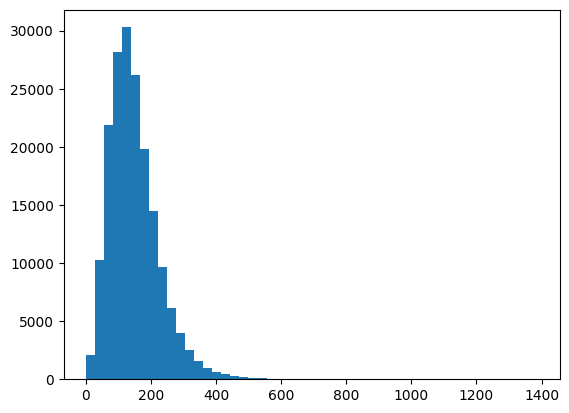

In [ ]:
# distribution of the char avarge length
plt.hist(char_length, bins=50)
plt.show()

Okay, looks like most of our sequences are between 0 and 200 characters long.

Let's use NumPy's percentile to figure out what length covers 95% of our sequences.

In [ ]:
# Find what character length covers 95% of sequences
output_seq_char_len =int(np.percentile(char_length, 95))
output_seq_char_len

290

In [ ]:
# Get all keyboard Characters
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# Creating the char-level text vectorizer
NUM_CHAR_TOKENS = len(alphabet) + 2 # for "space" and the "OOV" token (OOV = out of vocabulary)
char_vectorizer = layers.TextVectorization(max_tokens=NUM_CHAR_TOKENS,
                                           output_mode='int',
                                          #  standardize=None,
                                           output_sequence_length=output_seq_char_len,
                                           name="char_vectorizer")

# Adapting the char_vectorizer on the dataset
char_vectorizer.adapt(train_chars)

In [ ]:
# Check the character vocab stats
char_vocab = char_vectorizer.get_vocabulary()
print(f"Number of different characters in character vocab: {len(char_vocab)}")
print(f"5 most common characters: {char_vocab[:5]}")
print(f"5 least common characters: {char_vocab[-5:]}")

Number of different characters in character vocab: 28
5 most common characters: ['', '[UNK]', np.str_('e'), np.str_('t'), np.str_('i')]
5 least common characters: [np.str_('k'), np.str_('x'), np.str_('z'), np.str_('q'), np.str_('j')]


In [ ]:
# Testing the char_vectorizer
random_char = random.choice(train_chars)
print(f"Sentence: {random_char}")
print(f"Length of sentence: {len(random_char)}")
print(f"Char_vectorized: {char_vectorizer([random_char])}")

Sentence: l e p t i n   ,   p a i - @   a n d   a d i p s i n   s h o w e d   s i g n i f i c a n t   p o s i t i v e   c o r r e l a t i o n   w i t h   b m i   ,   u n l i k e   a d i p o n e c t i n   w h i c h   s h o w e d   i n v e r s e   c o r r e l a t i o n   (   p   <   @   )   .
Length of sentence: 281
Char_vectorized: [[12  2 14  3  4  6 14  5  4  5  6 10  5 10  4 14  9  4  6  9 13  7 20  2
  10  9  4 18  6  4 17  4 11  5  6  3 14  7  9  4  3  4 21  2 11  7  8  8
   2 12  5  3  4  7  6 20  4  3 13 22 15  4 16  6 12  4 23  2  5 10  4 14
   7  6  2 11  3  4  6 20 13  4 11 13  9 13  7 20  2 10  4  6 21  2  8  9
   2 11  7  8  8  2 12  5  3  4  7  6 14  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 

You'll notice sequences with a length shorter than 290 (`output_seq_char_length`) get padded with zeros on the end, this ensures all sequences passed to our model are the same length.

Also, due to the `standardize` parameter of `TextVectorization` being `"lower_and_strip_punctuation"` and the `split` parameter being `"whitespace"` by default, symbols (such as `@`) and spaces are removed.

> 🔑 **Note:** If you didn't want punctuation to be removed (keep the `@`, `%` etc), you can create a custom standardization callable and pass it as the `standardize` parameter. See the [`TextVectorization`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization) layer documentation for more.


### Creating a character-level embedding
We've got a way to vectorize our character-level sequences, now's time to create a character-level embedding.

Just like our custom token embedding, we can do so using the [`tensorflow.keras.layers.Embedding`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding) class.

Our character-level embedding layer requires an input dimension and output dimension.

The input dimension (`input_dim`) will be equal to the number of different characters in our `char_vocab` (28). And since we're following the structure of the model in Figure 1 of [*Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts*](https://arxiv.org/pdf/1612.05251.pdf), the output dimension of the character embedding (`output_dim`) will be 25.

In [ ]:
# Create char embedding layer
char_embedding = layers.Embedding(input_dim=NUM_CHAR_TOKENS, # number of different characters
                              output_dim=25, # embedding dimension of each character (same as Figure 1 in https://arxiv.org/pdf/1612.05251.pdf)
                              mask_zero=False, # don't use masks (this messes up model_5 if set to True)
                              name="char_embed")

# Test out character embedding layer
print(f"Charified text (before vectorization and embedding):\n{random_char}\n")
char_embed_example = char_embedding(char_vectorizer([random_char]))
print(f"Embedded chars (after vectorization and embedding):\n{char_embed_example}\n")
print(f"Character embedding shape: {char_embed_example.shape}")

Charified text (before vectorization and embedding):
l e p t i n   ,   p a i - @   a n d   a d i p s i n   s h o w e d   s i g n i f i c a n t   p o s i t i v e   c o r r e l a t i o n   w i t h   b m i   ,   u n l i k e   a d i p o n e c t i n   w h i c h   s h o w e d   i n v e r s e   c o r r e l a t i o n   (   p   <   @   )   .

Embedded chars (after vectorization and embedding):
[[[ 0.02834124 -0.03306152  0.02198249 ... -0.01397372  0.01999957
    0.02893145]
  [ 0.01977574  0.042631   -0.04730581 ... -0.00486342  0.02084472
    0.007406  ]
  [-0.01264163 -0.04400107  0.01975331 ... -0.03812478  0.03637259
   -0.04770374]
  ...
  [-0.00694279  0.02707315 -0.04995684 ... -0.00617851 -0.02063973
   -0.04079658]
  [-0.00694279  0.02707315 -0.04995684 ... -0.00617851 -0.02063973
   -0.04079658]
  [-0.00694279  0.02707315 -0.04995684 ... -0.00617851 -0.02063973
   -0.04079658]]]

Character embedding shape: (1, 290, 25)


### Building a Conv1D model to fit on character embeddings
Now we've got a way to turn our character-level sequences into numbers (`char_vectorizer`) as well as numerically represent them as an embedding (`char_embed`) let's test how effective they are at encoding the information in our sequences by creating a character-level sequence model.

The model will have the same structure as our custom token embedding model (`model_1`) except it'll take character-level sequences as input instead of token-level sequences.

```
Input (character-level text) -> Tokenize -> Embedding -> Layers (Conv1D, GlobalMaxPool1D) -> Output (label probability)
```


In [ ]:
# Make Conv1D on chars only
inputs = layers.Input(shape=(1,), dtype="string")
char_vectors = char_vectorizer(inputs)
char_embeddings = char_embedding(char_vectors)
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(char_embeddings)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)
model_3 = tf.keras.Model(inputs=inputs,
                         outputs=outputs,
                         name="model_3_conv1D_char_embedding")

# Compile model
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Check the summary of conv1d_char_model
model_3.summary()

Model: "model_3_conv1D_char_embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ char_vectorizer                 │ (None, 290)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ char_embed (Embedding)          │ (None, 290, 25)        │         1,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 290, 64)        │         8,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 64)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,139 (39.61 KB)

 Trainable params: 10,139 (39.61 KB)

 Non-trainable params: 0 (0.00 B)

Before fitting our model on the data, we'll create char-level batched `PrefetchedDataset`'s.

In [ ]:
# Create char datasets
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

train_char_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
# Fit the model on chars only
model_3_history = model_3.fit(train_char_dataset,
                              steps_per_epoch=int(0.1 * len(train_char_dataset)),
                              epochs=5,
                              validation_data=val_char_dataset,
                              validation_steps=int(0.1 * len(val_char_dataset)))

Epoch 1/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4231 - loss: 1.4018 - val_accuracy: 0.5828 - val_loss: 1.0560
Epoch 2/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5816 - loss: 1.0513 - val_accuracy: 0.6154 - val_loss: 0.9684
Epoch 3/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6182 - loss: 0.9593 - val_accuracy: 0.6469 - val_loss: 0.8923
Epoch 4/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6513 - loss: 0.9120 - val_accuracy: 0.6609 - val_loss: 0.8639
Epoch 5/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6613 - loss: 0.8658 - val_accuracy: 0.6702 - val_loss: 0.8426


In [ ]:
# Evaluate model_3 on whole validation char dataset
model_3.evaluate(val_char_dataset)

945/945 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6657 - loss: 0.8578


[0.8597926497459412, 0.6681119799613953]

In [ ]:
# Make predictions with character model only
model_3_pred_probs = model_3.predict(val_char_dataset)
model_3_pred_probs

945/945 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


array([[0.33157423, 0.26148427, 0.06399231, 0.32771605, 0.0152331 ],
       [0.12261476, 0.7026464 , 0.00389451, 0.15062942, 0.02021487],
       [0.1758128 , 0.2508959 , 0.2551549 , 0.26853317, 0.04960318],
       ...,
       [0.01851016, 0.0488261 , 0.19572954, 0.02350698, 0.7134272 ],
       [0.02069619, 0.06004087, 0.60991   , 0.05623648, 0.2531165 ],
       [0.27817705, 0.60820127, 0.02895094, 0.07411817, 0.01055263]],
      dtype=float32)

In [ ]:
# Convert predictions to classes
model_3_preds = tf.argmax(model_3_pred_probs, axis=1)
model_3_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 2, 1])>

In [ ]:
# Calculate Conv1D char only model results
model_3_results = calculate_results(y_true=val_label_encoded,
                                        y_pred=model_3_preds)
model_3_results

{'accuracy': 0.6681120084734543,
 'precision': 0.6759106525517918,
 'recall': 0.6681120084734543,
 'f1': 0.6641025685357556}

## Model 4: Combining pretrained token embeddings + character embeddings (hybrid embedding layer)

Alright, now things are going to get spicy.

In moving closer to build a model similar to the one in Figure 1 of [*Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts*](https://arxiv.org/pdf/1612.05251.pdf), it's time we tackled the hybrid token embedding layer they speak of.

This hybrid token embedding layer is a combination of token embeddings and character embeddings. In other words, they create a stacked embedding to represent sequences before passing them to the sequence label prediction layer.

So far we've built two models which have used token and character-level embeddings, however, these two models have used each of these embeddings exclusively.

To start replicating (or getting close to replicating) the model in Figure 1, we're going to go through the following steps:
1. Create a token-level model (similar to `model_1`)
2. Create a character-level model (similar to `model_3` with a slight modification to reflect the paper)
3. Combine (using [`layers.Concatenate`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Concatenate)) the outputs of 1 and 2
4. Build a series of output layers on top of 3 similar to Figure 1 and section 4.2 of [*Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts*](https://arxiv.org/pdf/1612.05251.pdf)
5. Construct a model which takes token and character-level sequences as input and produces sequence label probabilities as output

** This is the model we're copying**

![Model](https://drive.google.com/uc?id=1UhudjzMgo8Shzv7KoojcEy9-xLSrxmdD)

In [ ]:
# Setting up the text_vectorizer layer/model
class UniversalTextEncoder(tf.keras.layers.Layer):
  def call(self, inputs):
    return kaggle_embedding_layer(inputs)

token_inputs = layers.Input(shape=[], dtype=tf.string, name="token_input")
token_embed = UniversalTextEncoder()(token_inputs)
token_output = layers.Dense(128, activation='relu', name='token_output')(token_embed)
token_model = tf.keras.models.Model(token_inputs, token_output)

# Setting up the char_vectorizer layer/model
char_inputs = layers.Input(shape=(1,), dtype=tf.string, name="char_input")
char_embed = char_embedding(char_vectorizer(char_inputs))
char_output = layers.Bidirectional(layers.LSTM(25),name='char_output')(char_embed)
char_model = tf.keras.models.Model(char_inputs, char_output)

# Concate the chat_model and token_model
token_char_concat = layers.Concatenate(name="token_char_hybrid")([token_model.output,
                                                                  char_model.output])

# Creating the output layers
combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(200, activation='relu')(combined_dropout)
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(len(class_names), activation="softmax")(final_dropout)

# 5. Construct model with char and token inputs
model_4 = tf.keras.Model(inputs=[token_model.inputs, char_model.inputs],
                         outputs=output_layer,
                         name="model_4")


In [ ]:
# Compile the model
model_4.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
# Summary of the model_4
model_4.summary()

Model: "model_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ char_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ token_input         │ (None)            │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ char_vectorizer     │ (None, 290)       │          0 │ char_input[0][0]  │
│ (TextVectorization) │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ universal_text_enc… │ (None, 512)       │          0 │ token_input[0][0] │
│ (UniversalTextEnco… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ char_embed          │ (None, 290, 25)   │      1,750 │ char_vectorizer[… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ token_output        │ (None, 128)       │     65,664 │ universal_text_e… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ char_output         │ (None, 50)        │     10,200 │ char_embed[1][0]  │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ token_char_hybrid   │ (None, 178)       │          0 │ token_output[0][… │
│ (Concatenate)       │                   │            │ char_output[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 178)       │          0 │ token_char_hybri… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 200)       │     35,800 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 200)       │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 5)         │      1,005 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 114,419 (446.95 KB)

 Trainable params: 114,419 (446.95 KB)

 Non-trainable params: 0 (0.00 B)

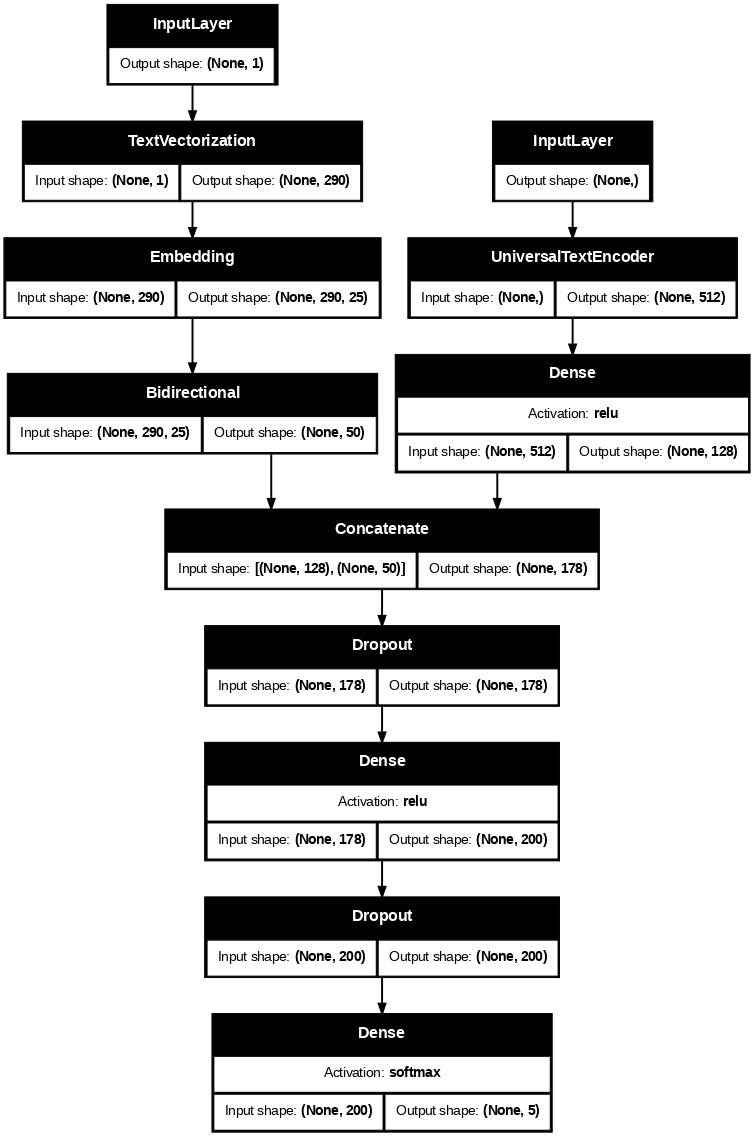

In [ ]:
# Plot hybrid token and character model
from tensorflow.keras.utils import plot_model
plot_model(model_4, dpi=70,show_shapes=True,show_layer_activations=True)

In [ ]:
# Compile token char model
model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(), # section 4.2 of https://arxiv.org/pdf/1612.05251.pdf mentions using SGD but we'll stick with Adam
                metrics=["accuracy"],
                jit_compile=False)

And again, to keep our experiments fast, we'll fit our token-character-hybrid model on 10% of training and validate on 10% of validation batches. However, the difference with this model is that it requires two inputs, token-level sequences and character-level sequences.

We can do this by create a `tf.data.Dataset` with a tuple as it's first input, for example:
* `((token_data, char_data), (label))`

Let's see it in action.

### Combining token and character data into a `tf.data` dataset

In [ ]:
# Combine chars and token into a dataset
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars)) # make data
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # make labels
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data, train_char_token_labels)) # combine data and labels

# Prefetch and batch train data
train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# same for validation dataset
val_token_char_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_token_char_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot) # make label
val_char_token_dataset = tf.data.Dataset.zip((val_token_char_data,val_token_char_labels))

# Prefetch and batch val data
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
# Check out training char and token embedding dataset
train_char_token_dataset, val_char_token_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

### Fitting a model on token and character-level sequences

In [ ]:
history_model_4 = model_4.fit(train_char_token_dataset,
                              steps_per_epoch=int(0.1*len(train_char_token_dataset)),
                              epochs=5,
                              validation_data=val_char_token_dataset,
                              validation_steps=int(0.1*len(val_char_token_dataset)),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_4")])

Saving TensorBoard log files to: model_logs/model_4/20250412-103309
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['token_input'], ['char_input']]
Received: inputs=('Tensor(shape=(None,))', 'Tensor(shape=(None,))')
  warnings.warn(msg)


562/562 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.5289 - loss: 1.1462 - val_accuracy: 0.7055 - val_loss: 0.7733
Epoch 2/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 31ms/step - accuracy: 0.6952 - loss: 0.7956 - val_accuracy: 0.7301 - val_loss: 0.7084
Epoch 3/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step - accuracy: 0.7066 - loss: 0.7662 - val_accuracy: 0.7390 - val_loss: 0.6816
Epoch 4/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.7222 - loss: 0.7322 - val_accuracy: 0.7527 - val_loss: 0.6634
Epoch 5/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 17s 31ms/step - accuracy: 0.7232 - loss: 0.7289 - val_accuracy: 0.7590 - val_loss: 0.6470


In [ ]:
# Evaluate on the whole validation dataset
model_4.evaluate(val_char_token_dataset)

945/945 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.7512 - loss: 0.6542


[0.6554047465324402, 0.7505958080291748]

Nice! Our token-character hybrid model has come to life!

To make predictions with it, since it takes multiplie inputs, we can pass the `predict()` method a tuple of token-level sequences and character-level sequences.

We can then evaluate the predictions as we've done before.

In [ ]:
# Make predictions using the token-character model hybrid
model_4_pred_probs = model_4.predict(val_char_token_dataset)
model_4_pred_probs

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['token_input'], ['char_input']]
Received: inputs=('Tensor(shape=(32,))', 'Tensor(shape=(32,))')
  warnings.warn(msg)


945/945 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step


array([[5.6454933e-01, 2.2316484e-01, 3.8388709e-03, 2.0088445e-01,
        7.5625344e-03],
       [4.1025233e-01, 4.7881189e-01, 6.7435903e-03, 9.9958286e-02,
        4.2339242e-03],
       [3.6377662e-01, 8.9012101e-02, 7.6214902e-02, 4.2448619e-01,
        4.6510156e-02],
       ...,
       [4.3566647e-04, 1.9268031e-03, 4.9644593e-02, 1.3824782e-04,
        9.4785470e-01],
       [4.4306312e-03, 2.8354082e-02, 3.1364778e-01, 1.9164408e-03,
        6.5165108e-01],
       [2.7010539e-01, 5.4922909e-01, 1.4249088e-01, 1.2077343e-02,
        2.6097268e-02]], dtype=float32)

In [ ]:
# Turn prediction probabilities into prediction classes
model_4_preds = tf.argmax(model_4_pred_probs, axis=1)
model_4_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 1])>

In [ ]:
# Get results of token-char-hybrid model
result_model_4 = calculate_results(y_true=val_label_encoded,
                                    y_pred=model_4_preds)
result_model_4

{'accuracy': 0.7505957897524163,
 'precision': 0.745981741626697,
 'recall': 0.7505957897524163,
 'f1': 0.7457797776645764}

In [ ]:
result_model_1_conv1d

{'accuracy': 0.7758837547994174,
 'precision': 0.7711126924413204,
 'recall': 0.7758837547994174,
 'f1': 0.7704813196780741}

## Model 5: Transfer Learning with pretrained token embeddings + character embeddings + positional embeddings

It seems like combining token embeddings and character embeddings gave our model a little performance boost.

But there's one more piece of the puzzle we can add in.

What if we engineered our own features into the model?

Meaning, what if we took our own knowledge about the data and encoded it in a numerical way to give our model more information about our samples?

The process of applying your own knowledge to build features as input to a model is called **feature engineering**.

Can you think of something important about the sequences we're trying to classify?

If you were to look at an abstract, would you expect the sentences to appear in order? Or does it make sense if they were to appear sequentially? For example, sequences labelled `CONCLUSIONS` at the beggining and sequences labelled `OBJECTIVE` at the end?

Abstracts typically come in a sequential order, such as:
* `OBJECTIVE` ...
* `METHODS` ...
* `METHODS` ...
* `METHODS` ...
* `RESULTS` ...
* `CONCLUSIONS` ...

Or

* `BACKGROUND` ...
* `OBJECTIVE` ...
* `METHODS` ...
* `METHODS` ...
* `RESULTS` ...
* `RESULTS` ...
* `CONCLUSIONS` ...
* `CONCLUSIONS` ...

Of course, we can't engineer the sequence labels themselves into the training data (we don't have these at test time), but we can encode the order of a set of sequences in an abstract.

For example,
* `Sentence 1 of 10` ...
* `Sentence 2 of 10` ...
* `Sentence 3 of 10` ...
* `Sentence 4 of 10` ...
* ...


You might've noticed this when we created our `preprocess_text_with_line_numbers()` function. When we read in a text file of abstracts, we counted the number of lines in an abstract as well as the number of each line itself.

Doing this led to the `"line_number"` and `"total_lines"` columns of our DataFrames.

In [ ]:
train_df.head()

,total_lines,target,text,line_numbers
0,12,OBJECTIVE,"to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .",0
1,12,METHODS,a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .,1
2,12,METHODS,outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .,2
3,12,METHODS,pain was assessed using the visual analog pain scale ( @-@ mm ) .,3
4,12,METHODS,"secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .",4


The `"line_number"` and `"total_lines"` columns are features which didn't necessarily come with the training data but can be passed to our model as a **positional embedding**. In other words, the positional embedding is where the sentence appears in an abstract.

We can use these features because they will be available at test time.

![example of engineering features into our dataset to help our model](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/09-engineered-features-at-test-time.png)
*Since abstracts typically have a sequential order about them (for example, background, objective, methods, results, conclusion), it makes sense to add the line number of where a particular sentence occurs to our model. The beautiful thing is, these features will be available at test time (we can just count the number of sentences in an abstract and the number of each one).*

Meaning, if we were to predict the labels of sequences in an abstract our model had never seen, we could count the number of lines and the track the position of each individual line and pass it to our model.

> 🛠 **Exercise:** Another way of creating our positional embedding feature would be to combine the `"line_number"` and `"total_lines"` columns into one, for example a `"line_position"` column may contain values like `1_of_11`, `2_of_11`, etc. Where `1_of_11` would be the first line in an abstract 11 sentences long. After going through the following steps, you might want to revisit this positional embedding stage and see how a combined column of `"line_position"` goes against two separate columns.

In [ ]:
# checking different line numbers
train_df['line_numbers'].value_counts()

,count
line_numbers,
0,15000
1,15000
2,15000
3,15000
4,14992
5,14949
6,14758
7,14279
8,13346


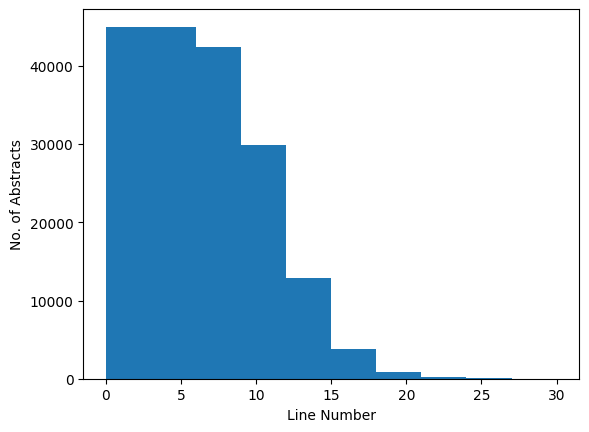

In [ ]:
# Checking the distribution of the line_number appearance
plt.hist(train_df['line_numbers'], bins=10)
plt.xlabel("Line Number")
plt.ylabel("No. of Abstracts")
plt.show()

In [ ]:
# Use Tensorflow to create one-hot encoded tensors of our "line_number" columns
train_line_number_one_hot = tf.one_hot(train_df['line_numbers'].to_numpy(), depth=15) # depth=15 to take most of the dataset
val_line_number_one_hot = tf.one_hot(val_df['line_numbers'].to_numpy(), depth=15)
test_line_numbers_one_hot = tf.one_hot(test_df["line_numbers"].to_numpy(), depth=15)
train_line_number_one_hot[:14], train_line_number_one_hot.shape

(<tf.Tensor: shape=(14, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.

Setting the `depth` parameter of `tf.one_hot` to 15 means any sample with a `"line_number"` value of over 15 gets set to a tensor of all 0's, where as any sample with a `"line_number"` of under 15 gets turned into a tensor of all 0's but with a 1 at the index equal to the `"line_number"` value.

> 🔑 **Note:** We could create a one-hot tensor which has room for all of the potential values of `"line_number"` (`depth=30`), however, this would end up in a tensor of double the size of our current one (`depth=15`) where the vast majority of values are 0. Plus, only ~2,000/180,000 samples have a `"line_number"` value of over 15. So we would not be gaining much information about our data for doubling our feature space. This kind of problem is called the **curse of dimensionality**. However, since this we're working with deep models, it might be worth trying to throw as much information at the model as possible and seeing what happens. I'll leave exploring values of the `depth` parameter as an extension.

In [ ]:
# How many different numbers of lines are there?
train_df["total_lines"].value_counts()

,count
total_lines,
12,24468
11,23639
13,22113
10,19400
14,18438
15,14610
9,12285
16,10768
8,7464


<Axes: ylabel='Frequency'>

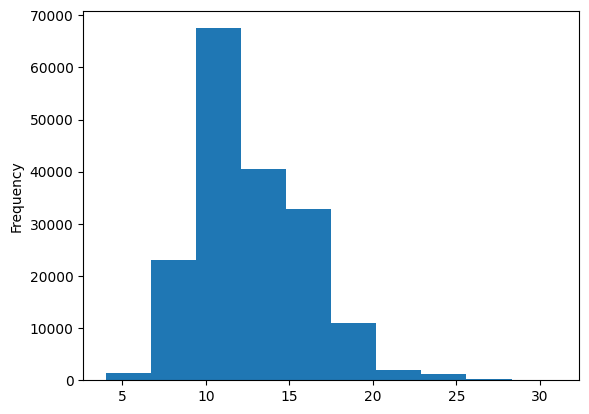

In [ ]:
train_df["total_lines"].plot(kind="hist")

Looking at the distribution of our `"total_lines"` column, a value of 20 looks like it covers the majority of samples.

We can confirm this with [`np.percentile()`](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html).

In [ ]:
# Check the coverage of a "total_lines" value of 20
np.percentile(train_df.total_lines, 98) # a value of 20 covers 98% of samples

np.float64(21.0)

In [ ]:
# Use TensorFlow to create one-hot-encoded tensors of our "total_lines" column
train_total_lines_one_hot = tf.one_hot(train_df["total_lines"].to_numpy(), depth=20)
val_total_lines_one_hot = tf.one_hot(val_df["total_lines"].to_numpy(), depth=20)
test_total_lines_one_hot = tf.one_hot(test_df["total_lines"].to_numpy(), depth=20)

# Check shape and samples of total lines one-hot tensor
train_total_lines_one_hot.shape, train_total_lines_one_hot[:10]

(TensorShape([180040, 20]),
 <tf.Tensor: shape=(10, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0

### Building a tribrid embedding model

Woohoo! Positional embedding tensors ready.

It's time to build the biggest model we've built yet. One which incorporates token embeddings, character embeddings and our newly crafted positional embeddings.

We'll be venturing into uncovered territory but there will be nothing here you haven't practiced before.

More specifically we're going to go through the following steps:

1. Create a token-level model (similar to `model_1`)
2. Create a character-level model (similar to `model_3` with a slight modification to reflect the paper)
3. Create a `"line_number"` model (takes in one-hot-encoded `"line_number"` tensor and passes it through a non-linear layer)
4. Create a `"total_lines"` model (takes in one-hot-encoded `"total_lines"` tensor and passes it through a non-linear layer)
5. Combine (using [`layers.Concatenate`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Concatenate)) the outputs of 1 and 2 into a token-character-hybrid embedding and pass it series of output to Figure 1 and section 4.2 of [*Neural Networks for Joint Sentence Classification
in Medical Paper Abstracts*](https://arxiv.org/pdf/1612.05251.pdf)
6. Combine (using [`layers.Concatenate`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Concatenate)) the outputs of 3, 4 and 5 into a token-character-positional tribrid embedding
7. Create an output layer to accept the tribrid embedding and output predicted label probabilities
8. Combine the inputs of 1, 2, 3, 4 and outputs of 7 into a [`tf.keras.Model`](https://www.tensorflow.org/api_docs/python/tf/keras/Model)

Woah! That's alot... but nothing we're not capable of. Let's code it.

In [ ]:
from tensorflow.keras import layers
# token embedding input layers
# Define custom Keras Layer using Universal Sentence Encoder from Kaggle Hub
class UniversalTextEncoder(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(UniversalTextEncoder, self).__init__(**kwargs)
        self.encoder = hub.KerasLayer(
            "https://www.kaggle.com/models/google/universal-sentence-encoder/TensorFlow2/universal-sentence-encoder/2",
            trainable=False,
            input_shape=[],
            dtype=tf.string,
            name="Universal_Text_Encoder"
        )

    def call(self, inputs):
        return self.encoder(inputs)

token_input = layers.Input(shape=[], dtype=tf.string,  name='token_input')
token_embed = UniversalTextEncoder()(token_input)
token_output = layers.Dense(120, activation='relu')(token_embed)
token_model = tf.keras.Model(token_input, token_output)

# Character embedding input layer
char_input = layers.Input(shape=(1,), dtype=tf.string,  name='char_input')
char_embed = char_embedding(char_vectorizer(char_input))
char_bi_lstm = layers.Bidirectional(layers.LSTM(25))(char_embed)
char_model = tf.keras.Model(char_input, char_bi_lstm)

# line number input layer
line_input = layers.Input(shape=(15,), dtype=tf.int32,  name='line_input')
line_output = layers.Dense(32, activation='relu')(line_input)
line_model = tf.keras.Model(line_input, line_output)

# total line input layer
total_line_input = layers.Input(shape=(20,), dtype=tf.int32,  name='total_line_input')
total_line_output = layers.Dense(32, activation='relu')(total_line_input)
total_line_model = tf.keras.Model(total_line_input, total_line_output)

# Merging the token and char embedding layers
token_char_embed = layers.Concatenate(name="Hybrid_embedding_layer")([token_model.output, char_model.output])

hidden = layers.Dense(256, activation='relu')(token_char_embed)
hidden = layers.Dropout(0.5)(hidden)

# Combine positional embeddings with combined token and char embeddings into a tribrid embedding
line_and_total_line_layer = layers.Concatenate(name="token_char_positional_embedding")([line_model.output,
                                                                total_line_model.output,
                                                                hidden])
hidden = layers.Dropout(0.5)(line_and_total_line_layer)
# Create output layer
output_layer = layers.Dense(5, activation="softmax", name="output_layer")(hidden)

# Put together model
model_5 = tf.keras.Model(inputs=[line_model.input,
                                 total_line_model.input,
                                 token_model.input,
                                 char_model.input],
                         outputs=output_layer)


KeyboardInterrupt: 

In [ ]:
# Get a summary of our token, char and positional embedding model
model_5.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ char_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ token_input         │ (None)            │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ char_vectorizer     │ (None, 290)       │          0 │ char_input[0][0]  │
│ (TextVectorization) │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ universal_text_enc… │ (None, 512)       │          0 │ token_input[0][0] │
│ (UniversalTextEnco… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ char_embed          │ (None, 290, 25)   │      1,750 │ char_vectorizer[… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 120)       │     61,560 │ universal_text_e… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 50)        │     10,200 │ char_embed[2][0]  │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Hybrid_embedding_l… │ (None, 170)       │          0 │ dense_6[0][0],    │
│ (Concatenate)       │                   │            │ bidirectional[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ line_input          │ (None, 15)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ total_line_input    │ (None, 20)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 256)       │     43,776 │ Hybrid_embedding… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 32)        │        512 │ line_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 32)        │        672 │ total_line_input… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 256)       │          0 │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ token_char_positio… │ (None, 320)       │          0 │ dense_7[0][0],    │
│ (Concatenate)       │                   │            │ dense_8[0][0],    │
│                     │                   │            │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 320)       │          0 │ token_char_posit… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_layer        │ (None, 5)         │      1,605 │ dropout_3[0][0]   │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 120,075 (469.04 KB)

 Trainable params: 120,075 (469.04 KB)

 Non-trainable params: 0 (0.00 B)

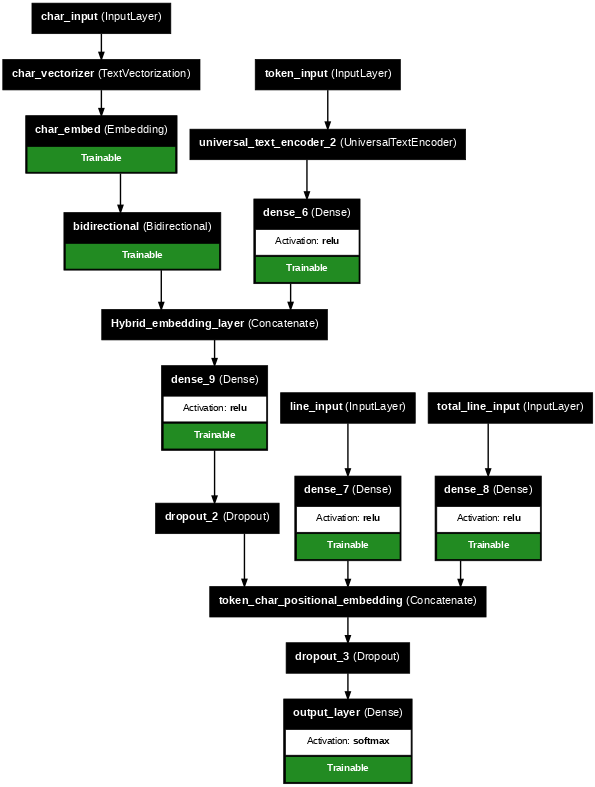

In [ ]:
# Plot the token, char, positional embedding model
from tensorflow.keras.utils import plot_model
plot_model(model_5, dpi=50, show_layer_activations=True,
           show_trainable=True,
           show_layer_names=True)

In [ ]:
# Check which layers are trainable or not
for layer in model_5.layers:
  print(f"Layers: {layer} Trainable: {layer.trainable}")

Layers: <InputLayer name=char_input, built=True> Trainable: True
Layers: <InputLayer name=token_input, built=True> Trainable: True
Layers: <TextVectorization name=char_vectorizer, built=True> Trainable: True
Layers: <UniversalTextEncoder name=universal_text_encoder_2, built=True> Trainable: True
Layers: <Embedding name=char_embed, built=True> Trainable: True
Layers: <Dense name=dense_6, built=True> Trainable: True
Layers: <Bidirectional name=bidirectional, built=True> Trainable: True
Layers: <Concatenate name=Hybrid_embedding_layer, built=True> Trainable: True
Layers: <InputLayer name=line_input, built=True> Trainable: True
Layers: <InputLayer name=total_line_input, built=True> Trainable: True
Layers: <Dense name=dense_9, built=True> Trainable: True
Layers: <Dense name=dense_7, built=True> Trainable: True
Layers: <Dense name=dense_8, built=True> Trainable: True
Layers: <Dropout name=dropout_2, built=True> Trainable: True
Layers: <Concatenate name=token_char_positional_embedding, built=

Now our model is constructed, let's compile it.

This time, we're going to introduce a new parameter to our loss function called `label_smoothing`. Label smoothing helps to regularize our model (prevent overfitting) by making sure it doesn't get too focused on applying one particular label to a sample.

For example, instead of having an output prediction of:
* `[0.0, 0.0, 1.0, 0.0, 0.0]` for a sample (the model is very confident the right label is index 2).

It's predictions will get smoothed to be something like:
* `[0.01, 0.01, 0.096, 0.01, 0.01]` giving a small activation to each of the other labels, in turn, hopefully improving generalization.

> 📖 **Resource:** For more on label smoothing, see the great blog post by PyImageSearch, [*Label smoothing with Keras, TensorFlow, and Deep Learning*](https://www.pyimagesearch.com/2019/12/30/label-smoothing-with-keras-tensorflow-and-deep-learning/).

In [ ]:
# Compile token, char, positional embedding model
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2), # add label smoothing (examples which are really confident get smoothed a little)
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"],
                jit_compile=False)

### Create tribrid embedding datasets and fit tribrid model

Model compiled!

Again, to keep our experiments swift, let's fit on 20,000 examples for 3 epochs.

This time our model requires four feature inputs:
1. Train line numbers one-hot tensor (`train_line_numbers_one_hot`)
2. Train total lines one-hot tensor (`train_total_lines_one_hot`)
3. Token-level sequences tensor (`train_sentences`)
4. Char-level sequences tensor (`train_chars`)

We can pass these as tuples to our `tf.data.Dataset.from_tensor_slices()` method to create appropriately shaped and batched `PrefetchedDataset`'s.

In [ ]:
# Create training and validation datasets (all four kinds of inputs)
train_pos_char_token_data = tf.data.Dataset.from_tensor_slices((train_line_number_one_hot, # line numbers
                                                                train_total_lines_one_hot, # total lines
                                                                train_sentences, # train tokens
                                                                train_chars)) # train chars
train_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # train labels
train_pos_char_token_dataset = tf.data.Dataset.zip((train_pos_char_token_data, train_pos_char_token_labels)) # combine data and labels
train_pos_char_token_dataset = train_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # turn into batches and prefetch appropriately

# Validation dataset
val_pos_char_token_data = tf.data.Dataset.from_tensor_slices((val_line_number_one_hot,
                                                              val_total_lines_one_hot,
                                                              val_sentences,
                                                              val_chars))
val_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_pos_char_token_dataset = tf.data.Dataset.zip((val_pos_char_token_data, val_pos_char_token_labels))
val_pos_char_token_dataset = val_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # turn into batches and prefetch appropriately

# Check input shapes
train_pos_char_token_dataset, val_pos_char_token_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [ ]:
# Fit the token, char and positional embedding model
history_model_5 = model_5.fit(train_pos_char_token_dataset,
                              steps_per_epoch=len(train_pos_char_token_dataset),
                              epochs=5,
                              validation_data=val_pos_char_token_dataset,
                              validation_steps=int(0.1 * len(val_pos_char_token_dataset)))

Epoch 1/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 186s 32ms/step - accuracy: 0.7514 - loss: 1.0622 - val_accuracy: 0.8368 - val_loss: 0.9239
Epoch 2/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 201s 32ms/step - accuracy: 0.8295 - loss: 0.9555 - val_accuracy: 0.8428 - val_loss: 0.9109
Epoch 3/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 202s 32ms/step - accuracy: 0.8406 - loss: 0.9390 - val_accuracy: 0.8431 - val_loss: 0.9071
Epoch 4/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 173s 31ms/step - accuracy: 0.8484 - loss: 0.9278 - val_accuracy: 0.8431 - val_loss: 0.9050
Epoch 5/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 211s 32ms/step - accuracy: 0.8538 - loss: 0.9212 - val_accuracy: 0.8444 - val_loss: 0.9056


<Axes: >

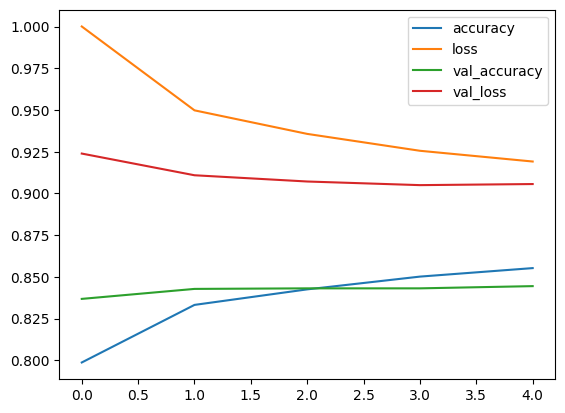

In [ ]:
# plot the learning curve
pd.DataFrame(history_model_5.history).plot()

In [ ]:
# Make predictions with token-char-positional hybrid model
model_5_pred_probs = model_5.predict(val_pos_char_token_dataset, verbose=1)
model_5_pred_probs

945/945 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step


array([[0.61560005, 0.08532814, 0.02273338, 0.24717805, 0.02916046],
       [0.5758064 , 0.13053204, 0.06027405, 0.21128468, 0.02210281],
       [0.42953938, 0.06107552, 0.03584193, 0.4369763 , 0.0365669 ],
       ...,
       [0.02844279, 0.09521445, 0.02638012, 0.03107863, 0.81888396],
       [0.03326256, 0.42363116, 0.08348189, 0.03431165, 0.42531273],
       [0.05958285, 0.8870598 , 0.01433734, 0.0262583 , 0.01276161]],
      dtype=float32)

In [ ]:
# Turn prediction probabilities into prediction classes
model_5_preds = tf.argmax(model_5_pred_probs, axis=1)
model_5_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1])>

In [ ]:
# Calculate results of token-char-positional hybrid model
model_5_results = calculate_results(y_true=val_label_encoded,
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 0.8481398119952337,
 'precision': 0.8507549844781311,
 'recall': 0.8481398119952337,
 'f1': 0.8450546955255382}

## Compare model results

Far out, we've come a long way. From a baseline model to training a model containing three different kinds of embeddings.

Now it's time to compare each model's performance against each other.

We'll also be able to compare our model's to the [*PubMed 200k RCT:
a Dataset for Sequential Sentence Classification in Medical Abstracts*](https://arxiv.org/pdf/1710.06071.pdf) paper.

Since all of our model results are in dictionaries, let's combine them into a pandas DataFrame to visualize them.

In [ ]:
baseline_result

{'accuracy': 0.7218323844829869,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

In [ ]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_result,
                                  "custom_token_embed_conv1d": result_model_1_conv1d,
                                  "pretrained_token_embed": result_model_2_pretrained_embed,
                                  "custom_char_embed_conv1d": model_3_results,
                                  "hybrid_char_token_embed": result_model_4,
                                  "tribrid_pos_char_token_embed": model_5_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,0.721832,0.718647,0.721832,0.698925
custom_token_embed_conv1d,0.775884,0.771113,0.775884,0.770481
pretrained_token_embed,0.735701,0.731392,0.735701,0.730026
custom_char_embed_conv1d,0.668112,0.675911,0.668112,0.664103
hybrid_char_token_embed,0.750596,0.745982,0.750596,0.745780
tribrid_pos_char_token_embed,0.848570,0.850482,0.848570,0.845802


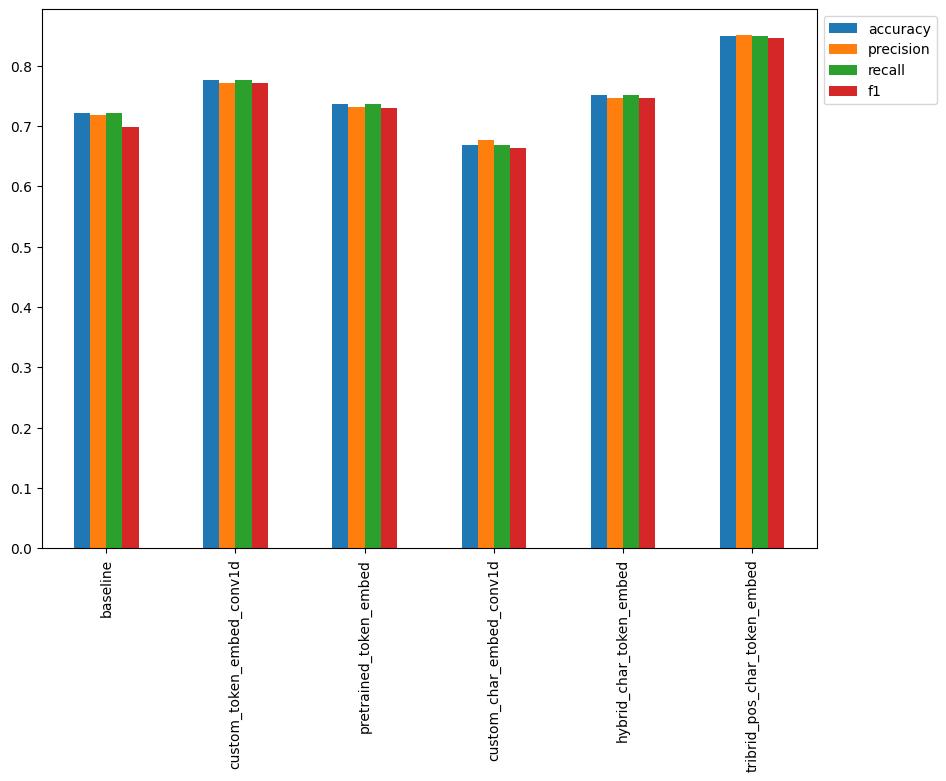

In [ ]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

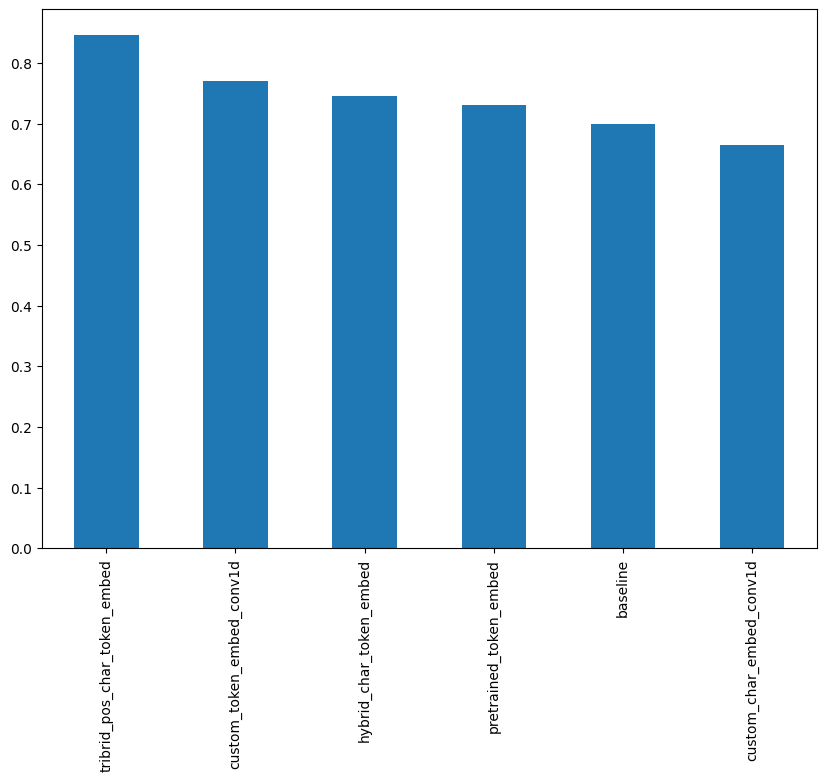

In [ ]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

Nice! Based on F1-scores, it looks like our tribrid embedding model performs the best by a fair margin.

Though, in comparison to the results reported in Table 3 of the [*PubMed 200k RCT:
a Dataset for Sequential Sentence Classification in Medical Abstracts*](https://arxiv.org/pdf/1710.06071.pdf) paper, our model's F1-score is still underperforming (the authors model achieves an F1-score of 90.0 on the 20k RCT dataset versus our F1-score of ~82.6).

There are some things to note about this difference:
* Our models (with an exception for the baseline) have been trained on ~18,000 (10% of batches) samples of sequences and labels rather than the full ~180,000 in the 20k RCT dataset.
  * This is often the case in machine learning experiments though, make sure training works on a smaller number of samples, then upscale when needed (an extension to this project will be training a model on the full dataset).
* Our model's prediction performance levels have been evaluated on the validation dataset not the test dataset (we'll evaluate our best model on the test dataset shortly).

## Save the best performing model

Since we've been through a fair few experiments, it's a good idea to save our best performing model so we can reuse it without having to retrain it.

We can save our best performing model by calling the `save()` method on it.

In [ ]:
# Save best performing model to SavedModel format (default)
model_5.save("09_skimlit_tribrid_model.keras") # model will be saved to path specified by string

### Loading the saved model Make predictions

To make sure our model saved and loaded correctly, let's make predictions with it, evaluate them and then compare them to the prediction results we calculated earlier.

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

class UniversalTextEncoder(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(UniversalTextEncoder, self).__init__(**kwargs)
        self.encoder = hub.KerasLayer(
            "https://www.kaggle.com/models/google/universal-sentence-encoder/TensorFlow2/universal-sentence-encoder/2",
            trainable=False,
            input_shape=[],
            dtype=tf.string,
            name="Universal_Text_Encoder"
        )

    def call(self, inputs):
        return self.encoder(inputs)

# Load downloaded model from Google Storage
loaded_model = tf.keras.models.load_model('/content/09_pubmed_rct_200k_model_final.keras',
                                          custom_objects={'UniversalTextEncoder': UniversalTextEncoder})

NameError: name 'UniversalTextEncoder' is not defined

In [ ]:
# Make predictions with the loaded model on the validation set
loaded_pred_probs = loaded_model.predict(val_pos_char_token_dataset, verbose=1)
loaded_preds = tf.argmax(loaded_pred_probs, axis=1)
loaded_preds[:10]

945/945 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 3, 2, 2, 4, 4, 4, 4, 1])>

In [ ]:
# Evaluate loaded model's predictions
loaded_model_results = calculate_results(val_label_encoded,
                                         loaded_preds)
loaded_model_results

{'accuracy': 0.848570104594201,
 'precision': 0.8504821982188282,
 'recall': 0.848570104594201,
 'f1': 0.8458016675063705}

In [ ]:
# Check loaded model summary (note the number of trainable parameters)
loaded_model.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ char_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ token_input         │ (None)            │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ char_vectorizer     │ (None, 290)       │          0 │ char_input[0][0]  │
│ (TextVectorization) │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ universal_text_enc… │ (None, 512)       │          0 │ token_input[0][0] │
│ (UniversalTextEnco… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ char_embed          │ (None, 290, 25)   │      1,750 │ char_vectorizer[… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 120)       │     61,560 │ universal_text_e… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 50)        │     10,200 │ char_embed[0][0]  │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Hybrid_embedding_l… │ (None, 170)       │          0 │ dense_8[0][0],    │
│ (Concatenate)       │                   │            │ bidirectional[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ line_input          │ (None, 15)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ total_line_input    │ (None, 20)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 256)       │     43,776 │ Hybrid_embedding… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 32)        │        512 │ line_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 32)        │        672 │ total_line_input… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 256)       │          0 │ dense_11[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ token_char_positio… │ (None, 320)       │          0 │ dense_9[0][0],    │
│ (Concatenate)       │                   │            │ dense_10[0][0],   │
│                     │                   │            │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 320)       │          0 │ token_char_posit… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_layer        │ (None, 5)         │      1,605 │ dropout_5[0][0]   │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 360,227 (1.37 MB)

 Trainable params: 120,075 (469.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 240,152 (938.10 KB)

## Evaluate model on test dataset

To make our model's performance more comparable with the results reported in Table 3 of the [*PubMed 200k RCT:
a Dataset for Sequential Sentence Classification in Medical Abstracts*](https://arxiv.org/pdf/1710.06071.pdf) paper, let's make predictions on the test dataset and evaluate them.

In [ ]:
# Create test dataset batch and prefetched
test_pos_char_token_data = tf.data.Dataset.from_tensor_slices((test_line_numbers_one_hot,
                                                               test_total_lines_one_hot,
                                                               test_sentences,
                                                               test_chars))
test_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot)
test_pos_char_token_dataset = tf.data.Dataset.zip((test_pos_char_token_data, test_pos_char_token_labels))
test_pos_char_token_dataset = test_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# Check shapes
test_pos_char_token_dataset

<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
# Make predictions on the test dataset
test_pred_probs = loaded_model.predict(test_pos_char_token_dataset,
                                       verbose=1)
test_preds = tf.argmax(test_pred_probs, axis=1)
test_preds[:10]

942/942 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([3, 2, 2, 2, 4, 4, 4, 1, 1, 0])>

In [ ]:
# Evaluate loaded model test predictions
loaded_model_test_results = calculate_results(y_true=test_label_encoded,
                                              y_pred=test_preds)
loaded_model_test_results

{'accuracy': 0.8437697030031525,
 'precision': 0.8444993243747277,
 'recall': 0.8437697030031525,
 'f1': 0.8407439795713982}

## Find most wrong

One of the best ways to investigate where your model is going wrong (or potentially where your data is wrong) is to visualize the "most wrong" predictions.

The most wrong predictions are samples where the model has made a prediction with a high probability but has gotten it wrong (the model's prediction disagreess with the ground truth label).

Looking at the most wrong predictions can give us valuable information on how to improve further models or fix the labels in our data.

Let's write some code to help us visualize the most wrong predictions from the test dataset.

First we'll convert all of our integer-based test predictions into their string-based class names.

In [ ]:
%%time
# Get list of class names of test predictions
test_pred_classes = [label_encoder.classes_[pred] for pred in test_preds]
test_pred_classes

CPU times: user 15.4 s, sys: 570 ms, total: 16 s
Wall time: 15.3 s


['OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'BACKGROUND',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'BACKGROUND',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'BACKGROUND',
 'METHODS',
 'BACKGROUND',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'BACKGROUND',
 'BACKGROUND',
 'BACKGROUND',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'METHODS',
 'RESULTS',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'R

In [ ]:
# Create prediction-enriched test dataframe
test_df["prediction"] = test_pred_classes # create column with test prediction class names
test_df["pred_prob"] = tf.reduce_max(test_pred_probs, axis=1).numpy() # get the maximum prediction probability
test_df["correct"] = test_df["prediction"] == test_df["target"] # create binary column for whether the prediction is right or not
test_df.head(20)

,total_lines,target,text,line_numbers,prediction,pred_prob,correct
0,9,BACKGROUND,this study analyzed liver function abnormalities in heart failure patients admitted with severe acute decompensated heart failure ( adhf ) .,0,OBJECTIVE,0.469300,False
1,9,RESULTS,a post hoc analysis was conducted with the use of data from the evaluation study of congestive heart failure and pulmonary artery catheterization effectiveness ( escape ) .,1,METHODS,0.550661,False
2,9,RESULTS,"liver function tests ( lfts ) were measured at @ time points from baseline , at discharge , and up to @ months follow-up .",2,METHODS,0.846772,False
3,9,RESULTS,"survival analyses were used to assess the association between admission model of end-stage liver disease excluding international normalized ratio ( meld-xi ) scores and patient outcome.there was a high prevalence of abnormal baseline ( admission ) lfts ( albumin @ % , aspartate transaminase @ % , alanine transaminase @ % , and total bilirubin @ % ) .",3,METHODS,0.832849,False
4,9,RESULTS,the percentage of patients with abnormal lfts decreased significantly from baseline to @-months ' follow-up .,4,RESULTS,0.802187,True
5,9,RESULTS,"when mean hemodynamic profiles were compared in patients with abnormal versus normal lfts , elevated total bilirubin was associated with a significantly lower cardiac index ( @ vs @ ; p < @ ) and higher central venous pressure ( @ vs @ ; p = @ ) .",5,RESULTS,0.862553,True
6,9,RESULTS,"multivariable analyses revealed that patients with elevated meld-xi scores ( @ ) had a @-fold ( hazard ratio@ @ , @ % confidence interval @-@ @ ) increased risk of death , rehospitalization , or transplantation after adjusting for baseline lfts , age , sex , race , body mass index , diabetes , and systolic blood pressure .",6,RESULTS,0.817528,True
7,9,CONCLUSIONS,abnormal lfts are common in the adhf population and are a dynamic marker of an impaired hemodynamic state .,7,CONCLUSIONS,0.567438,True
8,9,CONCLUSIONS,elevated meld-xi scores are associated with poor outcomes among patients admitted with adhf .,8,CONCLUSIONS,0.677585,True
9,13,BACKGROUND,minimally invasive endovascular aneurysm repair ( evar ) could be a surgical technique that improves outcome of patients with ruptured abdominal aortic aneurysm ( raaa ) .,0,BACKGROUND,0.587401,True


In [ ]:
# Find top 100 most wrong samples (note: 100 is an abitrary number, you could go through all of them if you wanted)
top_100_wrong = test_df[test_df["correct"] == False].sort_values("pred_prob", ascending=False)[:100]
top_100_wrong

,total_lines,target,text,line_numbers,prediction,pred_prob,correct
8545,12,METHODS,pretest-posttest .,1,BACKGROUND,0.966612,False
18720,16,RESULTS,non-diffuse-trickling '' ) .,8,BACKGROUND,0.929495,False
16347,13,BACKGROUND,to evaluate the effects of the lactic acid bacterium lactobacillus salivarius on caries risk factors .,0,OBJECTIVE,0.928249,False
9087,17,METHODS,ethical approval has been received from the national research ethics service ( north east : @/ne/@ for protocol version @ dated @ june @ ) .,15,BACKGROUND,0.924520,False
671,8,METHODS,to determine whether the insulin resistance that exists in metabolic syndrome ( mets ) patients is modulated by dietary fat composition .,0,OBJECTIVE,0.923726,False
...,...,...,...,...,...,...,...
19786,12,CONCLUSIONS,"in conclusion , t replacement effects were fiber-type dependent , restricted to increases in cell size , p@ , and peak power , and dependent on the paradigm selected ( wk vs mo ) .",11,RESULTS,0.857540,False
5664,16,METHODS,"response rates were high across all follow-ups , and still reached @ % from mothers and @ % from fathers at @ years .",8,RESULTS,0.857282,False
19028,9,OBJECTIVE,"participants were compared for psychological resilience ( connor-davidson resilience scale ) , symptoms of ptsd ( children 's revised impact of events scale ) , and depression ( center for epidemiologic studies depression scale ) at baseline , after treatment , and three-month follow-up .",3,METHODS,0.857255,False
705,15,RESULTS,the bi requires further testing in a randomised controlled trial ( rct ) in order to provide evidence of efficacy .,12,CONCLUSIONS,0.857088,False


In [ ]:
# Investigate top wrong preds
for row in top_100_wrong[0:10].itertuples(): # adjust indexes to view different samples
  _, target, text, line_number, total_lines, prediction, pred_prob, _ = row
  print(f"Target: {target}, Pred: {prediction}, Prob: {pred_prob}, Line number: {line_number}, Total lines: {total_lines}\n")
  print(f"Text:\n{text}\n")
  print("-----\n")

Target: 12, Pred: BACKGROUND, Prob: 0.9666118025779724, Line number: pretest-posttest ., Total lines: 1

Text:
METHODS

-----

Target: 16, Pred: BACKGROUND, Prob: 0.9294949173927307, Line number: non-diffuse-trickling '' ) ., Total lines: 8

Text:
RESULTS

-----

Target: 13, Pred: OBJECTIVE, Prob: 0.9282488226890564, Line number: to evaluate the effects of the lactic acid bacterium lactobacillus salivarius on caries risk factors ., Total lines: 0

Text:
BACKGROUND

-----

Target: 17, Pred: BACKGROUND, Prob: 0.9245196580886841, Line number: ethical approval has been received from the national research ethics service ( north east : @/ne/@ for protocol version @ dated @ june @ ) ., Total lines: 15

Text:
METHODS

-----

Target: 8, Pred: OBJECTIVE, Prob: 0.9237257838249207, Line number: to determine whether the insulin resistance that exists in metabolic syndrome ( mets ) patients is modulated by dietary fat composition ., Total lines: 0

Text:
METHODS

-----

Target: 7, Pred: METHODS, Pro

## Training the model for `PubMed RCT 200k Data set`

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

# Load downloaded model from Google Storage
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/09_skimlit_tribrid_model.keras',
                                          custom_objects={'UniversalTextEncoder': UniversalTextEncoder})

NameError: name 'UniversalTextEncoder' is not defined

In [ ]:
# Universal Encoder layer has to be non-trainable because we want to use the pretrained sentence encoder

for layer in loaded_model.layers:
  if layer.name == "universal_text_encoder_3":
    layer.trainable = False
  print(layer, layer.trainable) # all the layers are trainable



<InputLayer name=char_input, built=True> True
<InputLayer name=token_input, built=True> True
<TextVectorization name=char_vectorizer, built=True> True
<UniversalTextEncoder name=universal_text_encoder_3, built=True> False
<Embedding name=char_embed, built=True> True
<Dense name=dense_10, built=True> True
<Bidirectional name=bidirectional_1, built=True> True
<Concatenate name=Hybrid_embedding_layer, built=True> True
<InputLayer name=line_input, built=True> True
<InputLayer name=total_line_input, built=True> True
<Dense name=dense_13, built=True> True
<Dense name=dense_11, built=True> True
<Dense name=dense_12, built=True> True
<Dropout name=dropout_4, built=True> True
<Concatenate name=token_char_positional_embedding, built=True> True
<Dropout name=dropout_5, built=True> True
<Dense name=output_layer, built=True> True


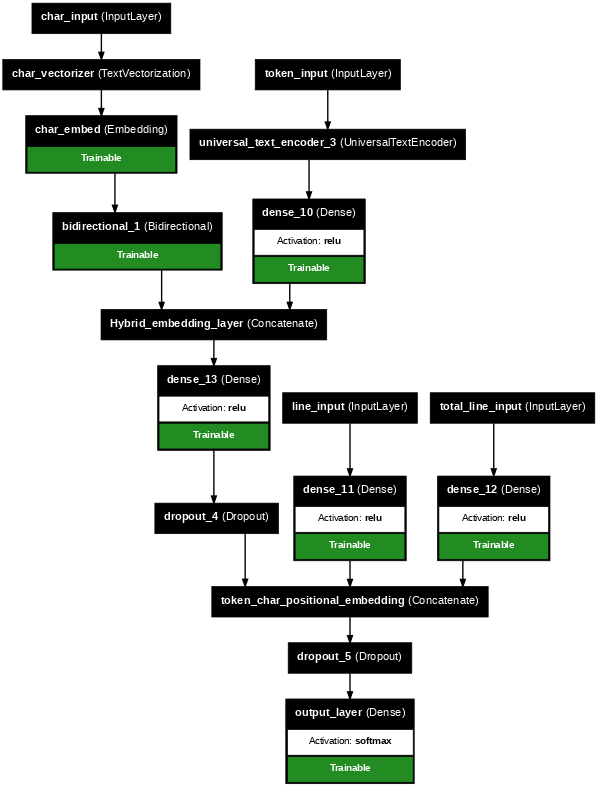

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(loaded_model, dpi=50, show_layer_activations=True,
           show_trainable=True,
           show_layer_names=True)

In [ ]:
!ls pubmed-rct/

PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [ ]:
data = "/content/pubmed-rct/PubMed_200k_RCT"

In [ ]:
import os
for files in os.listdir(data):
  filename = data + "/" + files
  print(filename)

/content/pubmed-rct/PubMed_200k_RCT/train.7z
/content/pubmed-rct/PubMed_200k_RCT/dev.txt
/content/pubmed-rct/PubMed_200k_RCT/test.txt


In [ ]:
# the pubmed rct 200k file is .7z so we need py7zr library to extract it.
!pip install py7zr

In [ ]:
import py7zr
train_data_dir = "/content/pubmed-rct/PubMed_200k_RCT/train.7z"
with py7zr.SevenZipFile(train_data_dir, mode='r') as z:
  z.extractall()

In [ ]:
# Let see the extracted file
get_lines("train.txt")[:15]

['###24491034\n',
 'BACKGROUND\tThe emergence of HIV as a chronic condition means that people living with HIV are required to take more responsibility for the self-management of their condition , including making physical , emotional and social adjustments .\n',
 'BACKGROUND\tThis paper describes the design and evaluation of Positive Outlook , an online program aiming to enhance the self-management skills of gay men living with HIV .\n',
 'METHODS\tThis study is designed as a randomised controlled trial in which men living with HIV in Australia will be assigned to either an intervention group or usual care control group .\n',
 "METHODS\tThe intervention group will participate in the online group program ` Positive Outlook ' .\n",
 'METHODS\tThe program is based on self-efficacy theory and uses a self-management approach to enhance skills , confidence and abilities to manage the psychosocial issues associated with HIV in daily life .\n',
 'METHODS\tParticipants will access the program f

In [ ]:
# Get data from file and preprocess it
%%time
train_200k_samples = preprocess_text_with_line_numbers("train.txt")
val_200k_samples = preprocess_text_with_line_numbers(data + "/dev.txt") # dev is another name for validation set
test_200k_samples = preprocess_text_with_line_numbers(data + "/test.txt")
len(train_200k_samples), len(val_200k_samples), len(test_200k_samples)

CPU times: user 3.79 s, sys: 955 ms, total: 4.74 s
Wall time: 5.76 s


(2211861, 28932, 29493)

In [ ]:
train_200k_samples[:10]

[{'total_lines': 11,
  'target': 'BACKGROUND',
  'text': 'the emergence of hiv as a chronic condition means that people living with hiv are required to take more responsibility for the self-management of their condition , including making physical , emotional and social adjustments .',
  'line_numbers': 0},
 {'total_lines': 11,
  'target': 'BACKGROUND',
  'text': 'this paper describes the design and evaluation of positive outlook , an online program aiming to enhance the self-management skills of gay men living with hiv .',
  'line_numbers': 1},
 {'total_lines': 11,
  'target': 'METHODS',
  'text': 'this study is designed as a randomised controlled trial in which men living with hiv in australia will be assigned to either an intervention group or usual care control group .',
  'line_numbers': 2},
 {'total_lines': 11,
  'target': 'METHODS',
  'text': "the intervention group will participate in the online group program ` positive outlook ' .",
  'line_numbers': 3},
 {'total_lines': 11,
 

In [ ]:
import pandas as pd
train_200k_df = pd.DataFrame(train_200k_samples)
val_200k_df = pd.DataFrame(val_200k_samples)
test_200k_df = pd.DataFrame(test_200k_samples)
train_200k_df.head(14)

,total_lines,target,text,line_numbers
0,11,BACKGROUND,the emergence of hiv as a chronic condition me...,0
1,11,BACKGROUND,this paper describes the design and evaluation...,1
2,11,METHODS,this study is designed as a randomised control...,2
3,11,METHODS,the intervention group will participate in the...,3
4,11,METHODS,the program is based on self-efficacy theory a...,4
5,11,METHODS,participants will access the program for a min...,5
6,11,METHODS,primary outcomes are domain specific self-effi...,6
7,11,METHODS,"secondary outcomes include : depression , anxi...",7
8,11,METHODS,"data collection will take place at baseline , ...",8
9,11,CONCLUSIONS,results of the positive outlook study will pro...,9


In [ ]:
# Distribution of labels in training data
train_200k_df.target.value_counts()

,count
target,
RESULTS,766271
METHODS,722586
CONCLUSIONS,339714
BACKGROUND,196689
OBJECTIVE,186601


In [ ]:
# Convert abstract text lines into lists
train_200k_sentences = train_200k_df["text"].tolist()
val_200k_sentences = val_200k_df["text"].tolist()
test_200k_sentences = test_200k_df["text"].tolist()
len(train_200k_sentences), len(val_200k_sentences), len(test_200k_sentences)

(2211861, 28932, 29493)

In [ ]:
# View first 10 lines of training sentences
train_200k_sentences[:10]

['the emergence of hiv as a chronic condition means that people living with hiv are required to take more responsibility for the self-management of their condition , including making physical , emotional and social adjustments .',
 'this paper describes the design and evaluation of positive outlook , an online program aiming to enhance the self-management skills of gay men living with hiv .',
 'this study is designed as a randomised controlled trial in which men living with hiv in australia will be assigned to either an intervention group or usual care control group .',
 "the intervention group will participate in the online group program ` positive outlook ' .",
 'the program is based on self-efficacy theory and uses a self-management approach to enhance skills , confidence and abilities to manage the psychosocial issues associated with hiv in daily life .',
 'participants will access the program for a minimum of 90 minutes per week over seven weeks .',
 'primary outcomes are domain s

<Axes: ylabel='Frequency'>

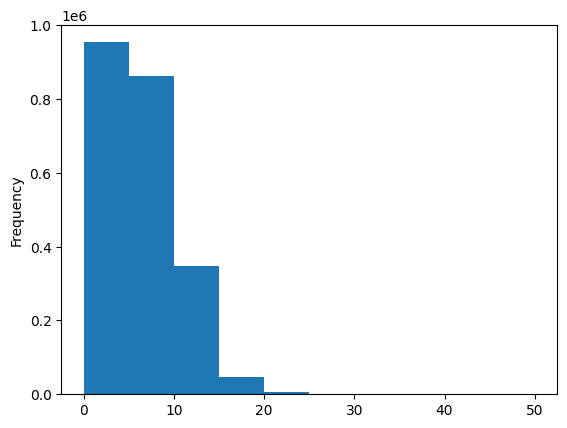

In [ ]:
# Check the distribution of "line_number" column
train_200k_df.line_numbers.plot.hist()

In [ ]:
np.percentile(train_200k_df.line_numbers, 98)

np.float64(15.0)

In [ ]:
# Use TensorFlow to create one-hot-encoded tensors of our "line_number" column
train_200k_line_numbers_one_hot = tf.one_hot(train_200k_df["line_numbers"].to_numpy(), depth=15)
val_200k_line_numbers_one_hot = tf.one_hot(val_200k_df["line_numbers"].to_numpy(), depth=15)
test_200k_line_numbers_one_hot = tf.one_hot(test_200k_df["line_numbers"].to_numpy(), depth=15)

In [ ]:
np.percentile(train_200k_df.total_lines, 98)

np.float64(21.0)

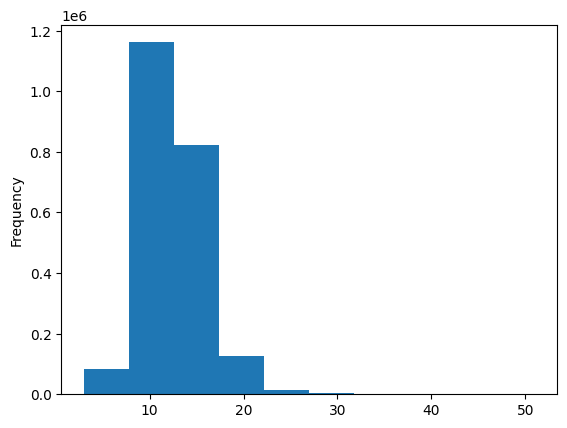

In [ ]:
# Check the distribution of total lines
train_200k_df.total_lines.plot.hist();

In [ ]:
# Use TensorFlow to create one-hot-encoded tensors of our "total_lines" column
train_200k_total_lines_one_hot = tf.one_hot(train_200k_df["total_lines"].to_numpy(), depth=20)
val_200k_total_lines_one_hot = tf.one_hot(val_200k_df["total_lines"].to_numpy(), depth=20)
test_200k_total_lines_one_hot = tf.one_hot(test_200k_df["total_lines"].to_numpy(), depth=20)

# Check shape and samples of total lines one-hot tensor
train_200k_total_lines_one_hot.shape, train_200k_total_lines_one_hot[:10]

(TensorShape([2211861, 20]),
 <tf.Tensor: shape=(10, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 

In [ ]:
# Split sequence-level data splits into character-level data splits
train_200k_chars = [split_chars(sentence) for sentence in train_200k_sentences]
val_200k_chars = [split_chars(sentence) for sentence in val_200k_sentences]
test_200k_chars = [split_chars(sentence) for sentence in test_200k_sentences]
print(train_200k_chars[0])

t h e   e m e r g e n c e   o f   h i v   a s   a   c h r o n i c   c o n d i t i o n   m e a n s   t h a t   p e o p l e   l i v i n g   w i t h   h i v   a r e   r e q u i r e d   t o   t a k e   m o r e   r e s p o n s i b i l i t y   f o r   t h e   s e l f - m a n a g e m e n t   o f   t h e i r   c o n d i t i o n   ,   i n c l u d i n g   m a k i n g   p h y s i c a l   ,   e m o t i o n a l   a n d   s o c i a l   a d j u s t m e n t s   .


In [ ]:
# What's the average character length?
char_200k_lens = [len(sentence) for sentence in train_200k_sentences]
mean_200k_char_len = np.mean(char_200k_lens)
mean_200k_char_len

np.float64(150.52200567757197)

In [ ]:
# Find what character length covers 95% of sequences
output_200k_seq_char_len = int(np.percentile(char_200k_lens, 95))
output_200k_seq_char_len

291

In [ ]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False)
train_200k_labels_one_hot = one_hot_encoder.fit_transform(tf.expand_dims(train_200k_df["target"].to_numpy(), axis=1))
val_200k_labels_one_hot = one_hot_encoder.fit_transform(tf.expand_dims(val_200k_df["target"].to_numpy(), axis=1))
test_200k_labels_one_hot = one_hot_encoder.fit_transform(tf.expand_dims(test_200k_df["target"].to_numpy(), axis=1))

train_200k_labels_one_hot = tf.constant(train_200k_labels_one_hot) # coverting them into tensor
val_200k_labels_one_hot = tf.constant(val_200k_labels_one_hot)
test_200k_labels_one_hot = tf.constant(test_200k_labels_one_hot)

In [ ]:
# Create training and validation datasets (all four kinds of inputs)
train_200k_pos_char_token_data = tf.data.Dataset.from_tensor_slices((train_200k_line_numbers_one_hot, # line numbers
                                                                train_200k_total_lines_one_hot, # total lines
                                                                train_200k_sentences, # train tokens
                                                                train_200k_chars)) # train chars
train_200k_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(train_200k_labels_one_hot) # train labels
train_200k_pos_char_token_dataset = tf.data.Dataset.zip((train_200k_pos_char_token_data, train_200k_pos_char_token_labels)) # combine data and labels
train_200k_pos_char_token_dataset = train_200k_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # turn into batches and prefetch appropriately

# Validation dataset
val_200k_pos_char_token_data = tf.data.Dataset.from_tensor_slices((val_200k_line_numbers_one_hot,
                                                              val_200k_total_lines_one_hot,
                                                              val_200k_sentences,
                                                              val_200k_chars))
val_200k_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(val_200k_labels_one_hot)
val_200k_pos_char_token_dataset = tf.data.Dataset.zip((val_200k_pos_char_token_data, val_200k_pos_char_token_labels))
val_200k_pos_char_token_dataset = val_200k_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # turn into batches and prefetch appropriately

# Check input shapes
train_200k_pos_char_token_dataset, val_200k_pos_char_token_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

### Compiling and Fitting the loaded_model to Pubmed 200k dataset

In [ ]:
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                          factor=0.2,
                                          min_lr=1e-7,
                                          patience=2,
                                          verbose=1)
earlystop = tf.keras.callbacks.EarlyStopping(monitor= "val_loss",
                                             patience=3)

In [ ]:
# compile the model
loaded_model.compile(loss="categorical_crossentropy",
                     optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                     metrics=['accuracy'],
                     jit_compile=False,
                     )

In [ ]:
# Fit the token, char and positional embedding model
history_loaded_model_200k = loaded_model.fit(train_200k_pos_char_token_dataset,
                                             steps_per_epoch=int(0.1 * len(train_200k_pos_char_token_dataset)),
                                             epochs=10,
                                             validation_data=val_200k_pos_char_token_dataset,
                                             validation_steps=int(0.1 * len(val_200k_pos_char_token_dataset)),
                                             callbacks=[lr, earlystop])

Epoch 1/10
6912/6912 ━━━━━━━━━━━━━━━━━━━━ 260s 38ms/step - accuracy: 0.8725 - loss: 0.3495 - val_accuracy: 0.8851 - val_loss: 0.3155 - learning_rate: 0.0010
Epoch 2/10
6912/6912 ━━━━━━━━━━━━━━━━━━━━ 231s 33ms/step - accuracy: 0.8671 - loss: 0.3627 - val_accuracy: 0.8885 - val_loss: 0.3105 - learning_rate: 0.0010
Epoch 3/10
6912/6912 ━━━━━━━━━━━━━━━━━━━━ 262s 38ms/step - accuracy: 0.8681 - loss: 0.3588 - val_accuracy: 0.8882 - val_loss: 0.3126 - learning_rate: 0.0010
Epoch 4/10
6912/6912 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8680 - loss: 0.3564
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
6912/6912 ━━━━━━━━━━━━━━━━━━━━ 229s 33ms/step - accuracy: 0.8680 - loss: 0.3564 - val_accuracy: 0.8889 - val_loss: 0.3134 - learning_rate: 0.0010
Epoch 5/10
6912/6912 ━━━━━━━━━━━━━━━━━━━━ 262s 38ms/step - accuracy: 0.8716 - loss: 0.3555 - val_accuracy: 0.8889 - val_loss: 0.3041 - learning_rate: 2.0000e-04
Epoch 6/10
6912/6912 ━━━━━━━━━━━━━━━━━━━━ 262s 38ms/step

In [ ]:
pd.DataFrame(history.history_loaded_model_200k).plot()

NameError: name 'history' is not defined

In [ ]:
loaded_model.save("09_pubmed_rct_200k_model_final.keras")

In [ ]:
# Evaluating the loaded_model
loaded_model.evaluate(val_200k_pos_char_token_dataset)

905/905 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.8820 - loss: 0.3117


[0.31056684255599976, 0.8818609118461609]

## Make example predictions

Okay, we've made some predictions on the test dataset, now's time to really test our model out.

To do so, we're going to get some data from the wild and see how our model performs.

**Data**
> Recent randomized controlled trials (RCTs) have shown no benefit but dose-dependent harm by early full nutritional support in critically ill patients. Lack of benefit may be explained by anabolic resistance, suppression of cellular repair processes, and aggravation of hyperglycemia and insulin needs. Also early high amino acid doses did not provide benefit, but instead associated with harm in patients with organ dysfunctions. However, most studies focused on nutritional interventions initiated during the first days after intensive care unit admission. Although the intervention window of some RCTs extended into the post-acute phase of critical illness, no large RCTs studied nutritional interventions initiated beyond the first week. Hence, clear evidence-based guidance on when and how to initiate and advance nutrition is lacking. Prolonged underfeeding will come at a price as there is no validated metabolic monitor that indicates readiness for medical nutrition therapy, and an adequate response to nutrition, which likely varies between patients. Also micronutrient status cannot be assessed reliably, as inflammation can cause redistribution, so that plasma micronutrient concentrations are not necessarily reflective of total body stores. Moreover, high doses of individual micronutrients have not proven beneficial. Accordingly, current evidence provides clear guidance on which nutritional strategies to avoid, but the ideal nutritional regimen for individual patients remains unclear. In this narrative review, we summarize the findings of recent studies, discuss possible mechanisms explaining the results, point out pitfalls in interpretation of RCTs and their effect on clinical practice, and formulate suggestions for future research.

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf


class UniversalTextEncoder(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(UniversalTextEncoder, self).__init__(**kwargs)
        self.encoder = hub.KerasLayer(
            "https://www.kaggle.com/models/google/universal-sentence-encoder/TensorFlow2/universal-sentence-encoder/2",
            trainable=False,
            input_shape=[],
            dtype=tf.string,
            name="Universal_Text_Encoder"
        )

    def call(self, inputs):
        return self.encoder(inputs)

# Load downloaded model from Google Storage
loaded_model = tf.keras.models.load_model('/content/09_pubmed_rct_200k_model_final.keras',
                                          custom_objects={'UniversalTextEncoder': UniversalTextEncoder})

In [ ]:
# Create sentencizer - Source: https://spacy.io/usage/linguistic-features#sbd
example_abstracts = "The therapeutic effects of bone marrow-derived mononuclear cells (BMMNCs) transplantation in patients with nonischaemic dilated cardiomyopathy (DCM) are still under debate. Current randomized controlled trials (RCTs) reported conflicting results. The aim of this study was to assess the effects of BMMNCs transplantation on left ventricular ejection fraction (LVEF) in patients with nonischaemic DCM.A comprehensive search of PubMed, EMBASE and Cochrane Controlled Trials Register was performed. We included RCTs reporting data on LVEF in patients with nonischaemic DCM after BMMNCs transplantation.Seven RCTs including 463 patients were included. BMMNCs transplantation significantly improved LVEF by 3.79% (95% CI: 0.56%-7.03%; P = .007) and LVESV by -24.36 mL (95% CI: -46.36 to -2.36 mL; P = .03), while had no impact on the risk of all-cause death (OR 0.92; 95% CI: 0.41 to 2.08%; P = .84). Subgroup analysis demonstrated a more significant improvement of LVEF in patients with longer follow-up (~15 months to 5 years) than shorter ones (12 months). Moreover, using bone marrow mononuclear cells was more effective than using G-CSF-stimulated bone marrow/peripheral blood stem cells in the improvement of LVEF in patients with nonischaemic DCM.Bone marrow-derived mononuclear cells transplantation is associated with a moderate, but significant, improvement in LVEF in patients with nonischaemic DCM. This meta-analysis supports further RCT conductions using BMMNCs transplantation with larger patient's population and longer term follow-up."
from spacy.lang.en import English
nlp = English() # setup English sentence parser

# New version of spaCy
sentencizer = nlp.add_pipe("sentencizer") # create sentence splitting pipeline object

# Old version of spaCy
# sentencizer = nlp.create_pipe("sentencizer") # create sentence splitting pipeline object
# nlp.add_pipe(sentencizer) # add sentence splitting pipeline object to sentence parser

# Create "doc" of parsed sequences, change index for a different abstract
doc = nlp(example_abstracts)
abstract_lines = [str(sent) for sent in list(doc.sents)] # return detected sentences from doc in string type (not spaCy token type)
len(abstract_lines)

9

In [ ]:
# using spacy libraray to split abstract
from spacy.lang.en import English

# Function to make predictions on custom dataset
def make_prediction_abstract(model):
  abstract = input("Please enter the Abstract:\n")
  print("")
  # this way of spliting the sentence are not correct because it is spliting at "." so, for number like 2.2, abhi.com it is not working.
  # sentence = [sentence.strip() for sentence in abstract.split(".") if sentence.strip()]

  # Right way to split abstract
  nlp = English() # setup English sentence parser
  # New version of spaCy
  sentencizer = nlp.add_pipe("sentencizer") # create sentence splitting pipeline object
  doc = nlp(abstract)
  sentence = [str(sent) for sent in list(doc.sents)]

  character = [" ".join(list(word)) for word in sentence]

  line_number = list(range(len(sentence)))

  total_line = [len(sentence)] * len(sentence) # Output Eg. : [3, 3, 3] if len(sentence) = 3

  # One-hot encoding the line_number and the total_line
  line_number_one_hot = tf.one_hot(line_number, axis=1, depth=15)
  total_line_one_hot = tf.one_hot(total_line, axis=1, depth=20)

  # Converting token and character in tensor
  sentence_tensor = tf.constant(sentence)
  character_tensor = tf.constant(character)

  # Making Prediction on data
  model_pred_probs = model.predict(x=(line_number_one_hot,
                                   total_line_one_hot,
                                   sentence_tensor,
                                   character_tensor), verbose=0)

  # # Converting pred probs in the labels
  # pred = tf.argmax(model_pred_probs, axis=1)
  # pred_labels = [label_encoder.classes_[i] for i in pred]

  # Converting pred probs in the labels
  class_name = ['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS']
  pred = tf.argmax(model_pred_probs, axis=1)
  pred_labels = [class_names[i] for i in pred]

  # Storing the result in dictionary
  result = {}
  for i,sen in enumerate(sentence):
    label = pred_labels[i]
    if label not in result:
      result[label] = [sen]
    else:
      result[label].append(sen)

  # Prediction Display formate
  desired_order = ['BACKGROUND', 'OBJECTIVE', 'METHODS', 'RESULTS', 'CONCLUSIONS']
  # Checking and printing each section in desired order
  for section in desired_order:
      if section in result:
          print(f"{section.title()}: ")  # Print the section heading (title case)
          for sentence in result[section]:
              print(sentence)
          print("")  # Add an extra newline for better readability between sections

In [ ]:
%%time
# Calling the function
make_prediction_abstract(loaded_model)

Please enter the Abstract:
Social media play an important role in plastic surgery, yet there are limited studies in the literature to guide plastic surgeons' social networking practices. To address this deficiency and provide further insight, the authors set out to investigate the public's attitude toward plastic surgery using Twitter, a popular social media platform. The authors examined a large body of messages (tweets) related to plastic surgery using novel techniques of natural language processing and sentiment analysis.The authors collected over 1 million tweets with the keywords "plastic," "cosmetic," "aesthetic," and "reconstruction" surgery spanning from 2012 to 2016 from the Twitter Gardenhose feed. Using hedonometrics, the authors extracted the average happiness/positivity (havg) of tweets and created word-shift graphs to determine the most influential words.The positivity scores for keywords "plastic," "cosmetic," "aesthetic," and "reconstruction" surgery were 5.72, 6.00, 6.

Social media play an important role in plastic surgery, yet there are limited studies in the literature to guide plastic surgeons' social networking practices. To address this deficiency and provide further insight, the authors set out to investigate the public's attitude toward plastic surgery using Twitter, a popular social media platform. The authors examined a large body of messages (tweets) related to plastic surgery using novel techniques of natural language processing and sentiment analysis.The authors collected over 1 million tweets with the keywords "plastic," "cosmetic," "aesthetic," and "reconstruction" surgery spanning from 2012 to 2016 from the Twitter Gardenhose feed. Using hedonometrics, the authors extracted the average happiness/positivity (havg) of tweets and created word-shift graphs to determine the most influential words.The positivity scores for keywords "plastic," "cosmetic," "aesthetic," and "reconstruction" surgery were 5.72, 6.00, 6.16, and 6.09, respectively. In relation to "plastic," keywords "cosmetic" and "aesthetic" were more positive because they lacked antagonistic words, such as "fake," "ugly," "bad," "fails," or "wrong." The keyword "reconstruction," however, was more positively associated than the term "plastic" because of an increase in positive words, such as "honor," "amazing," "successful," and "respect." Tweets containing the term "plastic" surgery trended toward negativity, and may be explained by the increase in unfavorable, associative words. Conversely, related terms such as "aesthetic," "cosmetic," and "reconstruction" were more favorably regarded because of the lack of antagonistic words and the presence of supportive words. The authors' results are informative and may serve to guide plastic surgeons' social media practices.